In [61]:
pip install --user numpy

Note: you may need to restart the kernel to use updated packages.


In [62]:
pip install --user pandas

Note: you may need to restart the kernel to use updated packages.


In [63]:
pip install --user matplotlib

Note: you may need to restart the kernel to use updated packages.


In [64]:
pip install --user seaborn

Note: you may need to restart the kernel to use updated packages.


In [65]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
df = pd.read_csv('/Users/engyamr/Downloads/Python/sales_data.csv')
df.head()

,Order Date,Order ID,Product,Product_ean,catégorie,Purchase Address,Quantity Ordered,Price Each,Cost price,turnover,margin
0,2019-01-22 21:25:00,141234,iPhone,5.638009e+12,Vêtements,"944 Walnut St, Boston, MA 02215",1,700.00,231.0000,700.00,469.0000
1,2019-01-28 14:15:00,141235,Lightning Charging Cable,5.563320e+12,Alimentation,"185 Maple St, Portland, OR 97035",1,14.95,7.4750,14.95,7.4750
2,2019-01-17 13:33:00,141236,Wired Headphones,2.113973e+12,Vêtements,"538 Adams St, San Francisco, CA 94016",2,11.99,5.9950,23.98,11.9900
3,2019-01-05 20:33:00,141237,27in FHD Monitor,3.069157e+12,Sports,"738 10th St, Los Angeles, CA 90001",1,149.99,97.4935,149.99,52.4965
4,2019-01-25 11:59:00,141238,Wired Headphones,9.692681e+12,Électronique,"387 10th St, Austin, TX 73301",1,11.99,5.9950,11.99,5.9950


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order Date        185950 non-null  object 
 1   Order ID          185950 non-null  int64  
 2   Product           185950 non-null  object 
 3   Product_ean       185950 non-null  float64
 4   catégorie         185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Quantity Ordered  185950 non-null  int64  
 7   Price Each        185950 non-null  float64
 8   Cost price        185950 non-null  float64
 9   turnover          185950 non-null  float64
 10  margin            185950 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 15.6+ MB


In [68]:
df.isnull().sum()

Order Date          0
Order ID            0
Product             0
Product_ean         0
catégorie           0
Purchase Address    0
Quantity Ordered    0
Price Each          0
Cost price          0
turnover            0
margin              0
dtype: int64

In [69]:
df.rename(columns={'catégorie': 'Category'}, inplace=True)

data_mapping = {
    'Vêtements': 'Clothes',
    'Électronique': 'Electronics'
}
df['Category'] = df['Category'].map(data_mapping).fillna(df['Category'])

In [70]:
unique_products = df['Product'].unique()

# Print the unique values
for product in unique_products:
    print(product)

iPhone
Lightning Charging Cable
Wired Headphones
27in FHD Monitor
AAA Batteries (4-pack)
27in 4K Gaming Monitor
USB-C Charging Cable
Bose SoundSport Headphones
Apple Airpods Headphones
Macbook Pro Laptop
Flatscreen TV
Vareebadd Phone
AA Batteries (4-pack)
Google Phone
20in Monitor
34in Ultrawide Monitor
ThinkPad Laptop
LG Dryer
LG Washing Machine


In [71]:
unique_categories = df['Category'].unique()

# Print the unique values
for category in unique_categories:
    print(category)

Clothes
Alimentation
Sports
Electronics


In [72]:
#we make a def funtion to minimize our unique values to lower
def change(x):
    if x in ['USB-C Charging Cable','Lightning Charging Cable']:
        return 'Charging Cables'
    elif x in ['AAA Batteries (4-pack)','AA Batteries (4-pack)']:
        return 'Batteries'
    elif x in ['Wired Headphones','Apple Airpods Headphones','Bose SoundSport Headphones']:
        return 'Headphones'
    elif x in ['27in FHD Monitor','27in 4K Gaming Monitor','34in Ultrawide Monitor','Flatscreen TV','20in Monitor']:
        return 'Smart Tv'
    elif x in ['iPhone','Google Phone','Vareebadd Phone']:
        return 'Smart Phones'
    elif x in ['Macbook Pro Laptop','ThinkPad Laptop']:
        return 'Laptops'
    elif x in ['LG Washing Machine','LG Dryer']:
        return 'Cleaning Machines'
    else:
        return 'Others'

In [73]:
df['Category'] = df['Product'].apply(change)

# Data Preprocessing

Date-Time Conversion

In [74]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Verify the changes
print(df.dtypes)

Order Date          datetime64[ns]
Order ID                     int64
Product                     object
Product_ean                float64
Category                    object
Purchase Address            object
Quantity Ordered             int64
Price Each                 float64
Cost price                 float64
turnover                   float64
margin                     float64
dtype: object


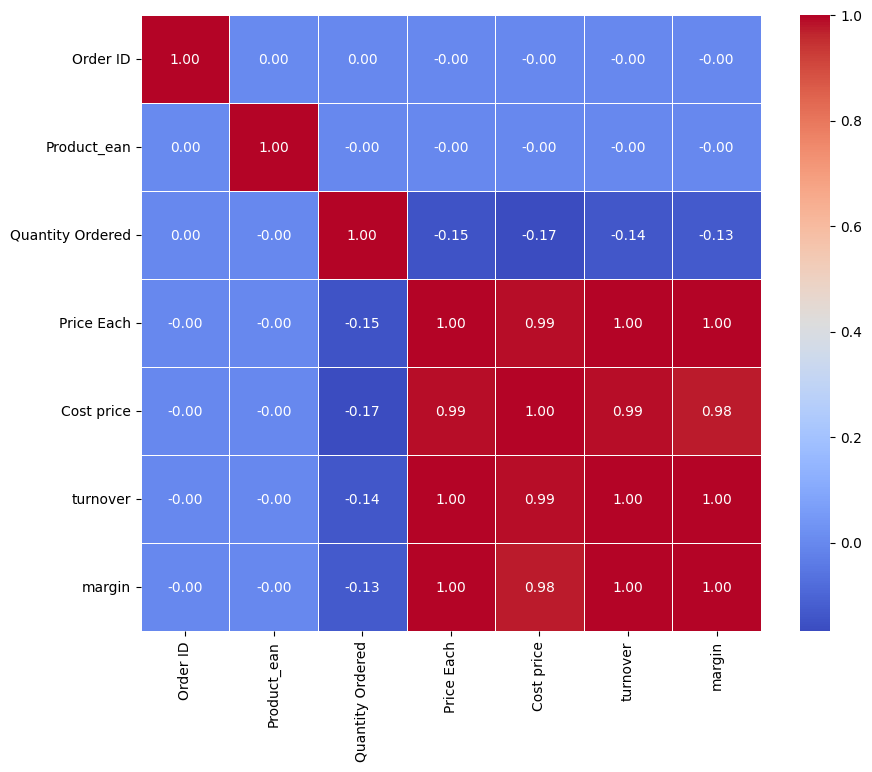

In [75]:
# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Define a custom color palette (replace 'coolwarm' with the desired colormap)
custom_cmap = sns.color_palette('coolwarm', as_cmap=True)

# Create a heatmap with the custom colormap
sns.heatmap(corr_matrix, cmap=custom_cmap, annot=True, fmt=".2f", linewidths=.5)

# Display the plot
plt.show()

Outlier Detection and Handling in Data Preprocessing

In [76]:
# Calculate IQR for each numerical column
Q1 = df.quantile(0.25, numeric_only=True)
Q3 = df.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1

# Define the outlier threshold
threshold = 1.5

# Identify outliers
outliers = ((df.select_dtypes(include='number') < (Q1 - threshold * IQR)) |
            (df.select_dtypes(include='number') > (Q3 + threshold * IQR))).any(axis=1)

# Display or handle outliers as needed
df_outliers = df[outliers]


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order Date        185950 non-null  datetime64[ns]
 1   Order ID          185950 non-null  int64         
 2   Product           185950 non-null  object        
 3   Product_ean       185950 non-null  float64       
 4   Category          185950 non-null  object        
 5   Purchase Address  185950 non-null  object        
 6   Quantity Ordered  185950 non-null  int64         
 7   Price Each        185950 non-null  float64       
 8   Cost price        185950 non-null  float64       
 9   turnover          185950 non-null  float64       
 10  margin            185950 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(3)
memory usage: 15.6+ MB


Monthly Aggregation

In [78]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Extract month and year
df["Year"]=df["Order Date"].dt.year
df["Month"]=df["Order Date"].dt.month

# Verify the changes
print(df[['Order Date', 'Month', 'Year']].head())

# Aggregate sales data on a monthly basis
#monthly_sales = dataset.groupby(['Year', 'Month'])['turnover'].sum().reset_index()
monthly_aggregated = df.groupby(['Year', 'Month']).agg({
    'Quantity Ordered': 'sum',
    'turnover': 'sum',
    'margin': 'mean'
}).reset_index()

print(monthly_aggregated)

           Order Date  Month  Year
0 2019-01-22 21:25:00      1  2019
1 2019-01-28 14:15:00      1  2019
2 2019-01-17 13:33:00      1  2019
3 2019-01-05 20:33:00      1  2019
4 2019-01-25 11:59:00      1  2019
    Year  Month  Quantity Ordered    turnover      margin
0   2019      1             10862  1813586.44  116.556149
1   2019      2             13449  2202022.42  114.331089
2   2019      3             17005  2807100.38  114.925969
3   2019      4             20558  3390670.24  115.412073
4   2019      5             18667  3152606.75  118.635877
5   2019      6             15253  2577802.26  118.244997
6   2019      7             16072  2647775.76  114.929352
7   2019      8             13448  2244467.88  116.724664
8   2019      9             13109  2097560.13  111.882255
9   2019     10             22703  3736726.88  114.644173
10  2019     11             19798  3199603.20  112.851696
11  2019     12             28114  4613443.34  114.854156
12  2020      1                41   

Feature Engineering

In [79]:
df['Total Sales'] = df['Quantity Ordered'] * df['Price Each']

# Verify the changes
print(df[['Order Date', 'Month', 'Year', 'Total Sales']].head())

           Order Date  Month  Year  Total Sales
0 2019-01-22 21:25:00      1  2019       700.00
1 2019-01-28 14:15:00      1  2019        14.95
2 2019-01-17 13:33:00      1  2019        23.98
3 2019-01-05 20:33:00      1  2019       149.99
4 2019-01-25 11:59:00      1  2019        11.99


# Data Analysis

Trend Visualization

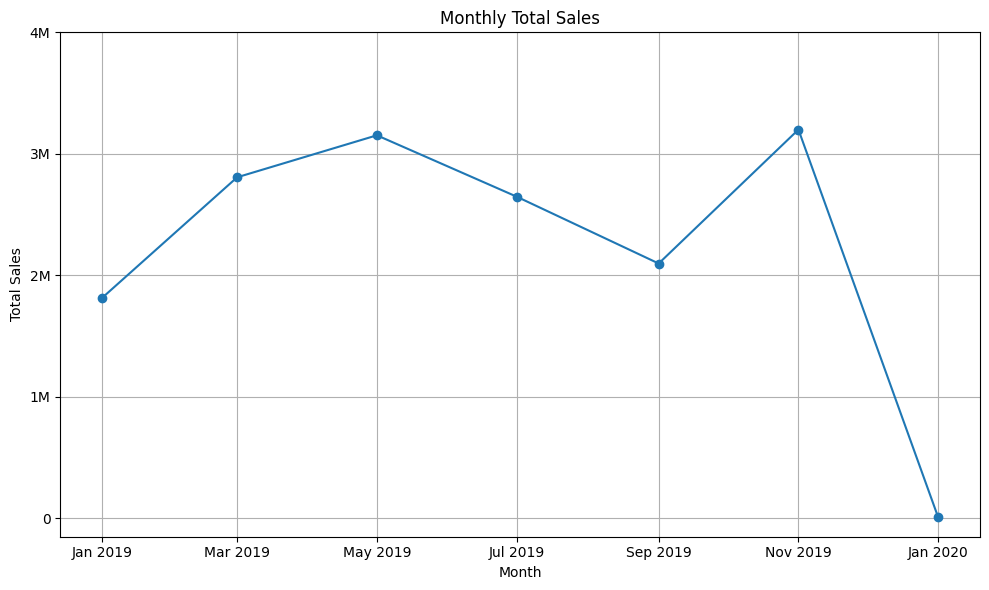

In [80]:
import matplotlib.dates as mdates

# Assuming 'Order Date' column is in datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Extract month and year from the 'Order Date' column
df['Month'] = df['Order Date'].dt.to_period('M')

# Group by month and calculate the sum of 'Total Sales'
monthly_sales = df.groupby('Month')['Total Sales'].sum().reset_index()

# Convert the 'Month' column to datetime for better formatting
monthly_sales['Month'] = monthly_sales['Month'].dt.to_timestamp()

# Specify the months you want to include
selected_months = ['2019-01', '2019-03', '2019-05', '2019-07', '2019-09', '2019-11', '2020-01']

# Filter the DataFrame based on selected months
selected_sales = monthly_sales[monthly_sales['Month'].dt.to_period('M').astype(str).isin(selected_months)]

# Plotting the line graph
plt.figure(figsize=(10, 6))
plt.plot(selected_sales['Month'], selected_sales['Total Sales'], marker='o', linestyle='-')
plt.title('Monthly Total Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')

# Set x-axis date format
date_format = mdates.DateFormatter('%b %Y')
plt.gca().xaxis.set_major_formatter(date_format)

# Set y-axis ticks and labels
plt.yticks([0, 1000000, 2000000, 3000000, 4000000], ['0', '1M', '2M', '3M', '4M'])

plt.tight_layout()
plt.grid(True)
plt.show()


Time Series Data Composition

Monthly Sales Growth Rate

/var/folders/jy/c15lzyz93gvct0xhlt5s7fl40000gn/T/ipykernel_14089/695860662.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df['Total Sales'].resample('M').sum().to_frame()


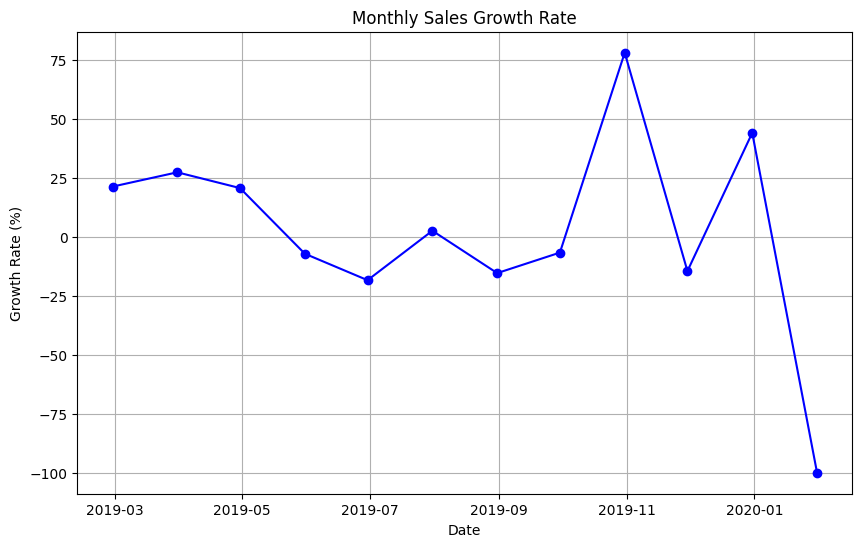

In [81]:
df.set_index('Order Date', inplace=True)

# Specify the column(s) to sum explicitly
monthly_sales = df['Total Sales'].resample('M').sum().to_frame()

# Calculate the monthly sales growth rate
monthly_sales['Sales Growth Rate'] = monthly_sales['Total Sales'].pct_change() * 100

# Plot the Monthly Sales Growth Rate line graph
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales['Sales Growth Rate'], marker='o', linestyle='-', color='b')
plt.title('Monthly Sales Growth Rate')
plt.xlabel('Date')
plt.ylabel('Growth Rate (%)')
plt.grid(True)
plt.show()

Creating User ID Column

In [82]:
#Creating a new Column for User ID
# Generate User IDs based on Purchase Address
# Create a dictionary to map Purchase Address to User ID starting from 1
user_id_map = {address: i + 1 for i, address in enumerate(df['Purchase Address'].unique())}

# Map Purchase Address to User ID
df['User ID'] = df['Purchase Address'].map(user_id_map)
df.head()

,Order ID,Product,Product_ean,Category,Purchase Address,Quantity Ordered,Price Each,Cost price,turnover,margin,Year,Month,Total Sales,User ID
Order Date,,,,,,,,,,,,,,
2019-01-22 21:25:00,141234,iPhone,5.638009e+12,Smart Phones,"944 Walnut St, Boston, MA 02215",1,700.00,231.0000,700.00,469.0000,2019,2019-01,700.00,1
2019-01-28 14:15:00,141235,Lightning Charging Cable,5.563320e+12,Charging Cables,"185 Maple St, Portland, OR 97035",1,14.95,7.4750,14.95,7.4750,2019,2019-01,14.95,2
2019-01-17 13:33:00,141236,Wired Headphones,2.113973e+12,Headphones,"538 Adams St, San Francisco, CA 94016",2,11.99,5.9950,23.98,11.9900,2019,2019-01,23.98,3
2019-01-05 20:33:00,141237,27in FHD Monitor,3.069157e+12,Smart Tv,"738 10th St, Los Angeles, CA 90001",1,149.99,97.4935,149.99,52.4965,2019,2019-01,149.99,4
2019-01-25 11:59:00,141238,Wired Headphones,9.692681e+12,Headphones,"387 10th St, Austin, TX 73301",1,11.99,5.9950,11.99,5.9950,2019,2019-01,11.99,5


In [83]:
# Check if every repeated "Purchase Address" has the same "User ID"
is_same_user_id = df.groupby('Purchase Address')['User ID'].nunique().eq(1).all()

print("Every repeated Purchase Address has the same User ID:", is_same_user_id)

Every repeated Purchase Address has the same User ID: True


In [84]:
# Check the number of unique values in the "Purchase Address" column
unique_purchase_addresses = df['Purchase Address'].nunique()
print("Number of unique values in Purchase Address column:", unique_purchase_addresses)

# Check the number of unique values in the "User ID" column
unique_user_ids = df['User ID'].nunique()
print("Number of unique values in User ID column:", unique_user_ids)

Number of unique values in Purchase Address column: 140787
Number of unique values in User ID column: 140787


In [85]:
#Creating a new column for the Product ID by Product

# Dictionary to store product IDs
product_ids = {}
product_id_counter = 1

# Function to generate product IDs
def generate_product_id(product):
    global product_id_counter
    if product not in product_ids:
        product_ids[product] = product_id_counter
        product_id_counter += 1
    return product_ids[product]

# Applying the function to create Product ID column
df['Product ID'] = df['Product'].apply(generate_product_id)

# Display the updated dataset
df.head()

,Order ID,Product,Product_ean,Category,Purchase Address,Quantity Ordered,Price Each,Cost price,turnover,margin,Year,Month,Total Sales,User ID,Product ID
Order Date,,,,,,,,,,,,,,,
2019-01-22 21:25:00,141234,iPhone,5.638009e+12,Smart Phones,"944 Walnut St, Boston, MA 02215",1,700.00,231.0000,700.00,469.0000,2019,2019-01,700.00,1,1
2019-01-28 14:15:00,141235,Lightning Charging Cable,5.563320e+12,Charging Cables,"185 Maple St, Portland, OR 97035",1,14.95,7.4750,14.95,7.4750,2019,2019-01,14.95,2,2
2019-01-17 13:33:00,141236,Wired Headphones,2.113973e+12,Headphones,"538 Adams St, San Francisco, CA 94016",2,11.99,5.9950,23.98,11.9900,2019,2019-01,23.98,3,3
2019-01-05 20:33:00,141237,27in FHD Monitor,3.069157e+12,Smart Tv,"738 10th St, Los Angeles, CA 90001",1,149.99,97.4935,149.99,52.4965,2019,2019-01,149.99,4,4
2019-01-25 11:59:00,141238,Wired Headphones,9.692681e+12,Headphones,"387 10th St, Austin, TX 73301",1,11.99,5.9950,11.99,5.9950,2019,2019-01,11.99,5,3


In [86]:
# Checking if any Product ID is repeated for the same Product
df['Is Repeated'] = df.duplicated(subset=['Product ID'])

In [87]:
df.head()

,Order ID,Product,Product_ean,Category,Purchase Address,Quantity Ordered,Price Each,Cost price,turnover,margin,Year,Month,Total Sales,User ID,Product ID,Is Repeated
Order Date,,,,,,,,,,,,,,,,
2019-01-22 21:25:00,141234,iPhone,5.638009e+12,Smart Phones,"944 Walnut St, Boston, MA 02215",1,700.00,231.0000,700.00,469.0000,2019,2019-01,700.00,1,1,False
2019-01-28 14:15:00,141235,Lightning Charging Cable,5.563320e+12,Charging Cables,"185 Maple St, Portland, OR 97035",1,14.95,7.4750,14.95,7.4750,2019,2019-01,14.95,2,2,False
2019-01-17 13:33:00,141236,Wired Headphones,2.113973e+12,Headphones,"538 Adams St, San Francisco, CA 94016",2,11.99,5.9950,23.98,11.9900,2019,2019-01,23.98,3,3,False
2019-01-05 20:33:00,141237,27in FHD Monitor,3.069157e+12,Smart Tv,"738 10th St, Los Angeles, CA 90001",1,149.99,97.4935,149.99,52.4965,2019,2019-01,149.99,4,4,False
2019-01-25 11:59:00,141238,Wired Headphones,9.692681e+12,Headphones,"387 10th St, Austin, TX 73301",1,11.99,5.9950,11.99,5.9950,2019,2019-01,11.99,5,3,True


In [88]:
print(df.columns)

Index(['Order ID', 'Product', 'Product_ean', 'Category', 'Purchase Address',
       'Quantity Ordered', 'Price Each', 'Cost price', 'turnover', 'margin',
       'Year', 'Month', 'Total Sales', 'User ID', 'Product ID', 'Is Repeated'],
      dtype='object')


# New Dataset combining all Products ordered by the same user

# Model Development

Creating a new dataset, where I add all products ordered for all users in one column called Products_Ordered

In [89]:
# Group by 'User ID' and concatenate all products into a single string
grouped_df = df.groupby('User ID')[['Product ID', 'Quantity Ordered']].apply(lambda x: ' | '.join([str(p) for p, q in zip(x['Product ID'], x['Quantity Ordered']) for _ in range(q)])).reset_index(name='Product_Ordered')

# Display the new dataset
grouped_df.head()

,User ID,Product_Ordered
0,1,1 | 7
1,2,2
2,3,3 | 3 | 13
3,4,4
4,5,3


In [90]:
# Group by 'User ID' and concatenate all products into a single string
#grouped_df = df.groupby('User ID').apply(lambda x: ' | '.join([str(p) for p, q in zip(x['Product ID'], x['Quantity Ordered']) for _ in range(q)])).reset_index(name='Product_Ordered')

# Display the new dataset
#grouped_df.head()

In [91]:
user_rows = grouped_df[grouped_df['User ID'] == 3]

user_rows.head()

,User ID,Product_Ordered
2,3,3 | 3 | 13


In [92]:
user_rows = df[df['User ID'] == 3]

user_rows.head()

,Order ID,Product,Product_ean,Category,Purchase Address,Quantity Ordered,Price Each,Cost price,turnover,margin,Year,Month,Total Sales,User ID,Product ID,Is Repeated
Order Date,,,,,,,,,,,,,,,,
2019-01-17 13:33:00,141236,Wired Headphones,2.113973e+12,Headphones,"538 Adams St, San Francisco, CA 94016",2,11.99,5.995,23.98,11.99,2019,2019-01,23.98,3,3,False
2019-11-05 13:10:00,293398,AA Batteries (4-pack),6.419055e+12,Batteries,"538 Adams St, San Francisco, CA 94016",1,3.84,1.920,3.84,1.92,2019,2019-11,3.84,3,13,True


In [93]:
product_mapping = df[['Product ID', 'Product']].drop_duplicates()

# Display the DataFrame without showing the index
print(product_mapping.to_string(index=False))

 Product ID                    Product
          1                     iPhone
          2   Lightning Charging Cable
          3           Wired Headphones
          4           27in FHD Monitor
          5     AAA Batteries (4-pack)
          6     27in 4K Gaming Monitor
          7       USB-C Charging Cable
          8 Bose SoundSport Headphones
          9   Apple Airpods Headphones
         10         Macbook Pro Laptop
         11              Flatscreen TV
         12            Vareebadd Phone
         13      AA Batteries (4-pack)
         14               Google Phone
         15               20in Monitor
         16     34in Ultrawide Monitor
         17            ThinkPad Laptop
         18                   LG Dryer
         19         LG Washing Machine


User-Product Interacion

In [94]:
grouped_df['Product_Ordered'] = grouped_df['Product_Ordered'].apply(lambda x: [int(i) for i in x.split('|')])
grouped_df.head(2).set_index('User ID')['Product_Ordered'].apply(pd.Series).reset_index()

,User ID,0,1
0,1,1.0,7.0
1,2,2.0,NaN


In [95]:
user_interacted_product = pd.melt(grouped_df.set_index('User ID')['Product_Ordered'].apply(pd.Series).reset_index(),
                                     id_vars=['User ID'],
                                     value_name='Product_Ordered'
                                    ).dropna().drop(['variable'], axis=1).rename(columns={'Product_Ordered': 'productId'}).reset_index(drop=True)
user_interacted_product['productId'] = user_interacted_product['productId'].astype(np.int64)
user_interacted_product.head()

,User ID,productId
0,1,1
1,2,2
2,3,3
3,4,4
4,5,3


In [96]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [97]:
from sklearn.model_selection import train_test_split

data_users = user_interacted_product['User ID']
data_items = user_interacted_product['productId']
# split the data test and train
train_users, test_users, train_items, test_items = train_test_split(data_users, data_items,
                                                                    test_size=0.2, random_state=42, shuffle=True)
train_data = pd.DataFrame((zip(train_users, train_items)),columns=['User ID', 'productId'])

train_data.head()

,User ID,productId
0,30187,3
1,3579,13
2,102630,5
3,50551,14
4,50519,13


In [98]:
train_data['interactions'] = 1
train_data.head()

,User ID,productId,interactions
0,30187,3,1
1,3579,13,1
2,102630,5,1
3,50551,14,1
4,50519,13,1


In [99]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [100]:
pip install ipywidgets==7.6.5

Note: you may need to restart the kernel to use updated packages.


In [101]:
# Get a list of all sku_ids
all_product_ids = train_data['productId'].unique()
all_customer_ids = train_data['User ID'].unique()
# Placeholders that will hold the training data
customerId, productId, interactions = [], [], []
# This is the set of items that each user has interaction with
customer_product_set = set(zip(train_data['User ID'], train_data['productId']))
# 4:1 ratio of negative to positive samples
num_negatives = 4

# Iterate through the customer_product_set without tqdm
for (u, i) in customer_product_set:
    customerId.append(u)
    productId.append(i)
    interactions.append(1) # items that the user has interacted with are positive
    for _ in range(num_negatives):
        # randomly select an item
        negative_item = np.random.choice(all_product_ids)
        # check that the user has not interacted with this item
        while (u, negative_item) in customer_product_set:
            negative_item = np.random.choice(all_product_ids)
        customerId.append(u)
        productId.append(negative_item)
        interactions.append(0) # items not interacted with are negative

interaction_matrix = pd.DataFrame(list(zip(customerId, productId, interactions)),columns=['User ID', 'productId', 'interactions'])
interaction_matrix.head()

,User ID,productId,interactions
0,50739,4,1
1,50739,17,0
2,50739,12,0
3,50739,2,0
4,50739,11,0


Embedding Layers, Concatenation Layer, Output Layer

In [102]:
data_x = np.array(interaction_matrix[['User ID', 'productId']].values)
data_y = np.array(interaction_matrix[['interactions']].values)
# split validation data
train_data_x, val_data_x, train_data_y, val_data_y = train_test_split(data_x, data_y, test_size=0.1, random_state=42, shuffle=True)
print("Train Data Shape {}".format(train_data_x.shape))
print("Validation Data Shape {}".format(val_data_x.shape))

Train Data Shape (668452, 2)
Validation Data Shape (74273, 2)


In [103]:
# train data
train_data_users = train_data_x[:,0]
train_data_items = train_data_x[:,1]
# validation data
val_data_users = val_data_x[:,0]
val_data_items = val_data_x[:,1]

In [104]:
number_of_users = train_data['User ID'].max()
number_of_items = train_data['productId'].max()
latent_dim_mf = 4
latent_dim_mlp = 32
reg_mf = 0
reg_mlp = 0.1
dense_layers = [128, 64, 32]
reg_layers = [0.1, 0.1, 0.1]
activation_dense = "relu"

In [105]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [106]:
import random
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Concatenate, Dense, Embedding, Flatten, Input, Multiply, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

# Define dropout rate
dropout_rate = 0.05  # Example: 20%

# input layer
user = Input(shape=(), dtype="int64", name="user_id")
item = Input(shape=(), dtype="int64", name="item_id")

# Embedding layers with L2 regularization and dropout
user_embedding = Embedding(
    input_dim=number_of_users + 1,
    output_dim=latent_dim_mf,
    embeddings_initializer="RandomNormal",
    embeddings_regularizer=l2(reg_mf),
    name="user_embedding",
)
item_embedding = Embedding(
    input_dim=number_of_items + 1,
    output_dim=latent_dim_mf,
    embeddings_initializer="RandomNormal",
    embeddings_regularizer=l2(reg_mf),
    name="item_embedding",
)

# Add dropout after embedding layers
user_dropout = Dropout(dropout_rate)(user_embedding(user))
item_dropout = Dropout(dropout_rate)(item_embedding(item))

# MF vector
user_latent = Flatten()(user_dropout)
item_latent = Flatten()(item_dropout)
mf_cat_latent = Multiply()([user_latent, item_latent])

# MLP vector
mlp_user_latent = Flatten()(user_dropout)
mlp_item_latent = Flatten()(item_dropout)
mlp_cat_latent = Concatenate()([mlp_user_latent, mlp_item_latent])

# Add dropout after concatenation for MLP
mlp_dropout = Dropout(dropout_rate)(mlp_cat_latent)

# Concatenation
mlp_vector = mlp_dropout

# build dense layers for model
for i in range(len(dense_layers)):
    layer = Dense(
            dense_layers[i],
            activity_regularizer=l2(reg_layers[i]),
            activation=activation_dense,
            name="layer%d" % i)
    mlp_vector = layer(mlp_vector)

NeuMf_layer = Concatenate()([mf_cat_latent, mlp_vector])

result = Dense(1, activation="relu", kernel_initializer="lecun_uniform", name="interaction")
output = result(NeuMf_layer)
model = Model(inputs=[user, item], outputs=output)

model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ user_id             │ (None)            │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ item_id             │ (None)            │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ user_embedding      │ (None, 4)         │    563,152 │ user_id[0][0]     │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ item_embedding      │ (None, 4)         │         80 │ item_id[0][0]     │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_6 (Dropout) │ (None, 4)         │          0 │ user_embedding[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_7 (Dropout) │ (None, 4)         │          0 │ item_embedding[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_10          │ (None, 4)         │          0 │ dropout_6[0][0]   │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_11          │ (None, 4)         │          0 │ dropout_7[0][0]   │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_4       │ (None, 8)         │          0 │ flatten_10[0][0], │
│ (Concatenate)       │                   │            │ flatten_11[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_8 (Dropout) │ (None, 8)         │          0 │ concatenate_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer0 (Dense)      │ (None, 128)       │      1,152 │ dropout_8[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_8 (Flatten) │ (None, 4)         │          0 │ dropout_6[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_9 (Flatten) │ (None, 4)         │          0 │ dropout_7[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer1 (Dense)      │ (None, 64)        │      8,256 │ layer0[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply_2          │ (None, 4)         │          0 │ flatten_8[0][0],  │
│ (Multiply)          │                   │            │ flatten_9[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer2 (Dense)      │ (None, 32)        │      2,080 │ layer1[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_5       │ (None, 36)        │          0 │ multiply_2[0][0], │
│ (Concatenate)       │                   │            │ layer2[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ interaction (Dense) │ (None, 1)         │         37 │ concatenate_5[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 574,757 (2.19 MB)

 Trainable params: 574,757 (2.19 MB)

 Non-trainable params: 0 (0.00 B)

In [107]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss="mse",
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name="accuracy"),
        tf.keras.metrics.Precision(name="precision"),
        tf.keras.metrics.Recall(name="recall")
    ],
)

In [108]:
import random
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Concatenate, Dense, Embedding, Flatten, Input, Multiply, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

# Define dropout rate
dropout_rate = 0.05  # Example: 20%

# input layer
user = Input(shape=(), dtype="int64", name="user_id")
item = Input(shape=(), dtype="int64", name="item_id")

# Embedding layers with L2 regularization and dropout
user_embedding = Embedding(
    input_dim=number_of_users + 1,
    output_dim=latent_dim_mf,
    embeddings_initializer="RandomNormal",
    embeddings_regularizer=l2(reg_mf),
    name="user_embedding",
)
item_embedding = Embedding(
    input_dim=number_of_items + 1,
    output_dim=latent_dim_mf,
    embeddings_initializer="RandomNormal",
    embeddings_regularizer=l2(reg_mf),
    name="item_embedding",
)

# Add dropout after embedding layers
user_dropout = Dropout(dropout_rate)(user_embedding(user))
item_dropout = Dropout(dropout_rate)(item_embedding(item))

# MF vector
user_latent = Flatten()(user_dropout)
item_latent = Flatten()(item_dropout)
mf_cat_latent = Multiply()([user_latent, item_latent])

# MLP vector
mlp_user_latent = Flatten()(user_dropout)
mlp_item_latent = Flatten()(item_dropout)
mlp_cat_latent = Concatenate()([mlp_user_latent, mlp_item_latent])

# Add dropout after concatenation for MLP
mlp_dropout = Dropout(dropout_rate)(mlp_cat_latent)

# Concatenation
mlp_vector = mlp_dropout

# Build dense layers for DNN with ReLU activation
dense_layers = [128, 64, 32]  # Example dense layers configuration
for i, units in enumerate(dense_layers):
    mlp_vector = Dense(units, activation='relu', name=f'dense_{i}')(mlp_vector)

# Concatenate MF vector and DNN output
NeuMf_layer = Concatenate()([mf_cat_latent, mlp_vector])

# Output layer with softmax activation for multi-class classification
output = Dense(number_of_items, activation='softmax', name='output')(NeuMf_layer)

model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ user_id             │ (None)            │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ item_id             │ (None)            │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ user_embedding      │ (None, 4)         │    563,152 │ user_id[0][0]     │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ item_embedding      │ (None, 4)         │         80 │ item_id[0][0]     │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_6 (Dropout) │ (None, 4)         │          0 │ user_embedding[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_7 (Dropout) │ (None, 4)         │          0 │ item_embedding[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_10          │ (None, 4)         │          0 │ dropout_6[0][0]   │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_11          │ (None, 4)         │          0 │ dropout_7[0][0]   │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_4       │ (None, 8)         │          0 │ flatten_10[0][0], │
│ (Concatenate)       │                   │            │ flatten_11[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_8 (Dropout) │ (None, 8)         │          0 │ concatenate_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer0 (Dense)      │ (None, 128)       │      1,152 │ dropout_8[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_8 (Flatten) │ (None, 4)         │          0 │ dropout_6[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_9 (Flatten) │ (None, 4)         │          0 │ dropout_7[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer1 (Dense)      │ (None, 64)        │      8,256 │ layer0[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply_2          │ (None, 4)         │          0 │ flatten_8[0][0],  │
│ (Multiply)          │                   │            │ flatten_9[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer2 (Dense)      │ (None, 32)        │      2,080 │ layer1[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_5       │ (None, 36)        │          0 │ multiply_2[0][0], │
│ (Concatenate)       │                   │            │ layer2[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ interaction (Dense) │ (None, 1)         │         37 │ concatenate_5[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 574,757 (2.19 MB)

 Trainable params: 574,757 (2.19 MB)

 Non-trainable params: 0 (0.00 B)

In [109]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss="mse",
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name="accuracy"),
        tf.keras.metrics.Precision(name="precision"),
        tf.keras.metrics.Recall(name="recall")
    ],
)

In [110]:
history = model.fit(x=[train_data_users, train_data_items], y=train_data_y,
                      batch_size=64, epochs=50,
                      validation_data=([val_data_users, val_data_items], val_data_y))

Epoch 1/50
10445/10445 ━━━━━━━━━━━━━━━━━━━━ 88s 8ms/step - accuracy: 0.7998 - loss: 0.1624 - precision: 0.1061 - recall: 2.6646e-05 - val_accuracy: 0.8004 - val_loss: 0.1536 - val_precision: 0.4310 - val_recall: 0.0017
Epoch 2/50
10445/10445 ━━━━━━━━━━━━━━━━━━━━ 78s 7ms/step - accuracy: 0.8158 - loss: 0.1315 - precision: 0.6501 - recall: 0.1675 - val_accuracy: 0.7905 - val_loss: 0.1547 - val_precision: 0.4220 - val_recall: 0.1356
Epoch 3/50
10445/10445 ━━━━━━━━━━━━━━━━━━━━ 84s 8ms/step - accuracy: 0.8640 - loss: 0.0997 - precision: 0.7715 - recall: 0.4561 - val_accuracy: 0.7702 - val_loss: 0.1668 - val_precision: 0.3846 - val_recall: 0.2525
Epoch 4/50
10445/10445 ━━━━━━━━━━━━━━━━━━━━ 78s 7ms/step - accuracy: 0.8973 - loss: 0.0790 - precision: 0.8348 - recall: 0.6061 - val_accuracy: 0.7578 - val_loss: 0.1775 - val_precision: 0.3605 - val_recall: 0.2759
Epoch 5/50
10445/10445 ━━━━━━━━━━━━━━━━━━━━ 80s 8ms/step - accuracy: 0.9150 - loss: 0.0681 - precision: 0.8711 - recall: 0.6752 - val_ac

In [111]:
# Assuming 'model' is your trained TensorFlow model object
model.save('/Users/engyamr/Downloads/Python/model.keras')

# Testing Model recommendations

In [112]:
df.head()

,Order ID,Product,Product_ean,Category,Purchase Address,Quantity Ordered,Price Each,Cost price,turnover,margin,Year,Month,Total Sales,User ID,Product ID,Is Repeated
Order Date,,,,,,,,,,,,,,,,
2019-01-22 21:25:00,141234,iPhone,5.638009e+12,Smart Phones,"944 Walnut St, Boston, MA 02215",1,700.00,231.0000,700.00,469.0000,2019,2019-01,700.00,1,1,False
2019-01-28 14:15:00,141235,Lightning Charging Cable,5.563320e+12,Charging Cables,"185 Maple St, Portland, OR 97035",1,14.95,7.4750,14.95,7.4750,2019,2019-01,14.95,2,2,False
2019-01-17 13:33:00,141236,Wired Headphones,2.113973e+12,Headphones,"538 Adams St, San Francisco, CA 94016",2,11.99,5.9950,23.98,11.9900,2019,2019-01,23.98,3,3,False
2019-01-05 20:33:00,141237,27in FHD Monitor,3.069157e+12,Smart Tv,"738 10th St, Los Angeles, CA 90001",1,149.99,97.4935,149.99,52.4965,2019,2019-01,149.99,4,4,False
2019-01-25 11:59:00,141238,Wired Headphones,9.692681e+12,Headphones,"387 10th St, Austin, TX 73301",1,11.99,5.9950,11.99,5.9950,2019,2019-01,11.99,5,3,True


In [113]:
# Assuming your dataset has a column named 'Product ID' for product IDs
all_product_ids = df['Product ID'].unique()

# Function to generate negative samples
def generate_negative_samples(customer_product_set, all_product_ids, num_negatives=4):
    customerId, productId, interactions = [], [], []
    
    for (u, i) in customer_product_set:
        customerId.append(u)
        productId.append(i)
        interactions.append(1)  # Items that the user has interacted with are positive
        for _ in range(num_negatives):
            # Randomly select an item
            negative_item = np.random.choice(all_product_ids)
            # Check that the user has not interacted with this item
            while (u, negative_item) in customer_product_set:
                negative_item = np.random.choice(all_product_ids)
            customerId.append(u)
            productId.append(negative_item)
            interactions.append(0)  # Items not interacted with are negative

    return customerId, productId, interactions

# Assuming your dataset has 'User ID' and 'Product ID' columns
data_users = df['User ID']
data_items = df['Product ID']

# Split the data into training and test sets
train_users, test_users, train_items, test_items = train_test_split(data_users, data_items,
                                                                    test_size=0.2, random_state=42)

# Create a set of items that each user has interacted with
customer_product_set = set(zip(train_users, train_items))

# Generate negative samples
customerId, productId, interactions = generate_negative_samples(customer_product_set, all_product_ids)

# Create interaction matrix
interaction_matrix = pd.DataFrame(list(zip(customerId, productId, interactions)),
                                  columns=['User ID', 'Product ID', 'Interactions'])

# Display interaction matrix
print(interaction_matrix.head())

   User ID  Product ID  Interactions
0    85741          15             1
1    85741          17             0
2    85741           8             0
3    85741           2             0
4    85741          14             0


In [114]:
def generate_negative_samples(customer_product_set, all_product_ids, num_negatives=4):
    customerId, productId, interactions = [], [], []
    
    for (u, i) in customer_product_set:
        customerId.append(u)
        productId.append(i)
        interactions.append(1)  # Items that the user has interacted with are positive
        
        negative_samples = set()  # Store negative samples to avoid duplicates
        
        for _ in range(num_negatives):
            # Randomly select an item
            negative_item = np.random.choice(all_product_ids)
            # Check that the user has not interacted with this item
            while (u, negative_item) in customer_product_set or negative_item in negative_samples:
                negative_item = np.random.choice(all_product_ids)
            negative_samples.add(negative_item)  # Add negative sample to set to avoid duplicates
            customerId.append(u)
            productId.append(negative_item)
            interactions.append(0)  # Items not interacted with are negative

    return customerId, productId, interactions

In [115]:
# Assuming your dataset has 'User ID' and 'Product ID' columns
data_users = df['User ID']
data_items = df['Product ID']

# Extract all product IDs from your dataset
all_product_ids = df['Product ID'].unique()

# Split the data into training and test sets
train_users, test_users, train_items, test_items = train_test_split(data_users, data_items,
                                                                    test_size=0.2, random_state=42)

# Create a set of items that each user has interacted with
customer_product_set = set(zip(train_users, train_items))

# Generate negative samples without duplicates
customerId, productId, interactions = generate_negative_samples(customer_product_set, all_product_ids)

# Create interaction matrix
interaction_matrix = pd.DataFrame(list(zip(customerId, productId, interactions)),
                                  columns=['User ID', 'Product ID', 'Interactions'])

# Display interaction matrix
print(interaction_matrix.head())

   User ID  Product ID  Interactions
0    85741          15             1
1    85741           2             0
2    85741          16             0
3    85741          19             0
4    85741          11             0


In [116]:
# test_data contains user-item pairs for testing
test_data = pd.DataFrame({'User ID': test_users, 'Product ID': test_items})

# Assuming your recommendation model is called 'model'
# Predict the interaction probabilities for test data
predicted_interactions = model.predict([test_data['User ID'], test_data['Product ID']])

# Combine the predictions with the test data
test_data['Predicted Interaction'] = predicted_interactions

# Sort the recommendations by predicted interaction probabilities
recommendations = test_data.sort_values(by='Predicted Interaction', ascending=False)

# Define the number of recommendations to generate for each user
N = 5  # For example, generate top 5 recommendations for each user

# Select the top-N recommendations for each user
top_n_recommendations = recommendations.groupby('User ID').head(N)

1163/1163 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [117]:
# Assuming your dataset has 'User ID' and 'Product ID' columns
data_users = df['User ID']
data_items = df['Product ID']

# Split the data into training and test sets
train_users, test_users, train_items, test_items = train_test_split(data_users, data_items,
                                                                    test_size=0.2, random_state=42)

# Define the user for whom you want to generate recommendations
target_user_id = 13  # Example user ID

# Retrieve the user's interactions or purchase history from your dataset
user_interactions = df[df['User ID'] == target_user_id]['Product ID'].unique()

# Filter out products that the user has already interacted with
uninteracted_products = np.setdiff1d(all_product_ids, user_interactions)

# Reshape input data if necessary
user_ids = np.full_like(uninteracted_products, target_user_id)
user_ids = user_ids.reshape((-1, 1))  # Assuming user_ids is a 1D array
uninteracted_products = uninteracted_products.reshape((-1, 1))  # Assuming uninteracted_products is a 1D array

# Predict the interaction probabilities for uninteracted products
predicted_interactions = model.predict([user_ids, uninteracted_products])

# Combine the predictions with the uninteracted products
recommendations_df = pd.DataFrame({'User ID': user_ids.flatten(), 'Product ID': uninteracted_products.flatten(), 'Predicted Interaction': predicted_interactions.flatten()})

# Sort the recommendations by predicted interaction probabilities
sorted_recommendations = recommendations_df.sort_values(by='Predicted Interaction', ascending=False)

# Select the top N recommendations
N = 5  # Number of recommendations to generate
top_recommendations = sorted_recommendations.head(N)

# Print or display the top recommendations
print("Top Recommendations for User", target_user_id)
print(top_recommendations)

#for User ID 13 it recommended Product ID 9 with a prediction interaction of 0.782764

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Top Recommendations for User 13
    User ID  Product ID  Predicted Interaction
5        13           7               0.756776
12       13          14               0.266771
4        13           6               0.244896
14       13          16               0.232131
13       13          15               0.077485


In [118]:
# Assuming your dataset has 'User ID' and 'Product ID' columns
data_users = df['User ID']
data_items = df['Product ID']

# Split the data into training and test sets
train_users, test_users, train_items, test_items = train_test_split(data_users, data_items,
                                                                    test_size=0.2, random_state=42)

# Define the user for whom you want to generate recommendations
target_user_id = 13  # Example user ID

# Retrieve the user's interactions or purchase history from your dataset
user_interactions = df[df['User ID'] == target_user_id]['Product ID'].unique()

# Filter out products that the user has already interacted with
uninteracted_products = np.setdiff1d(all_product_ids, user_interactions)

# Reshape input data if necessary
user_ids = np.full_like(uninteracted_products, target_user_id)
user_ids = user_ids.reshape((-1, 1))  # Assuming user_ids is a 1D array
uninteracted_products = uninteracted_products.reshape((-1, 1))  # Assuming uninteracted_products is a 1D array

# Predict the interaction probabilities for uninteracted products
predicted_interactions = model.predict([user_ids, uninteracted_products])

# Combine the predictions with the uninteracted products
recommendations_df = pd.DataFrame({'User ID': user_ids.flatten(), 'Product ID': uninteracted_products.flatten(), 'Predicted Interaction': predicted_interactions.flatten()})

# Sort the recommendations by predicted interaction probabilities
sorted_recommendations = recommendations_df.sort_values(by='Predicted Interaction', ascending=False)

# Select the top N recommendations
N = 5  # Number of recommendations to generate
top_recommendations = sorted_recommendations.head(N)

# Print or display the top recommendations
print("Top Recommendations for User", target_user_id)
print(top_recommendations)

#for User ID 13 it recommended Product ID 9 with a prediction interaction of 0.782764

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Top Recommendations for User 13
    User ID  Product ID  Predicted Interaction
5        13           7               0.756776
12       13          14               0.266771
4        13           6               0.244896
14       13          16               0.232131
13       13          15               0.077485


# Model Evaluation and Results

In [119]:
# Access precision and recall from the history object
train_precision = history.history['precision']
train_recall = history.history['recall']

val_precision = history.history['val_precision']
val_recall = history.history['val_recall']

print("Train Precision:", train_precision)
print("Train Recall:", train_recall)

print("Validation Precision:", val_precision)
print("Validation Recall:", val_recall)

Train Precision: [0.5540540814399719, 0.6292362809181213, 0.7446902394294739, 0.8107021450996399, 0.8528017401695251, 0.8777369260787964, 0.8941993117332458, 0.9040154218673706, 0.910904586315155, 0.9145276546478271, 0.9163904786109924, 0.9193645715713501, 0.922675609588623, 0.9234480261802673, 0.9248895049095154, 0.9274268746376038, 0.9273465275764465, 0.9275661706924438, 0.9278861880302429, 0.9299474954605103, 0.9302887916564941, 0.931318998336792, 0.9311572313308716, 0.9318580627441406, 0.9328201413154602, 0.9332965612411499, 0.932835578918457, 0.933515191078186, 0.9346799850463867, 0.9335396885871887, 0.934674859046936, 0.9353978037834167, 0.9348457455635071, 0.9352472424507141, 0.9352965354919434, 0.9352638721466064, 0.9369361996650696, 0.9358976483345032, 0.9370592832565308, 0.9360180497169495, 0.9374531507492065, 0.9371088743209839, 0.9379393458366394, 0.9371905326843262, 0.9380443692207336, 0.9391146302223206, 0.93730628490448, 0.9386235475540161, 0.9385623931884766, 0.93761152

Precision and Recall

In [120]:
# Precision and recall values for each epoch
precision_values = train_precision
recall_values = train_recall

# Calculate average precision and recall
avg_precision = np.mean(precision_values)
avg_recall = np.mean(recall_values)

print("Average Precision:", avg_precision)
print("Average Recall:", avg_recall)

Average Precision: 0.9080142390727997
Average Recall: 0.7396071045205462


In [121]:
# Precision and recall values for each epoch
precision_values = [0.8755, 0.8803, 0.8790, 0.8766, 0.8771, 0.8734, 0.8710, 0.8717, 0.8708, 0.8693, 0.8697, 0.8680, 0.8681, 0.8680, 0.8662, 0.8693, 0.8672, 0.8699, 0.8675, 0.8686, 0.8695, 0.8690, 0.8679, 0.8671, 0.8672, 0.8680, 0.8685, 0.8666, 0.8683, 0.8697, 0.8659, 0.8645, 0.8647, 0.8640, 0.8661, 0.8638, 0.8663, 0.8638, 0.8643, 0.8621, 0.8635, 0.8637]
recall_values = [0.7732, 0.7775, 0.7720, 0.7665, 0.7664, 0.7635, 0.7620, 0.7576, 0.7580, 0.7592, 0.7570, 0.7573, 0.7566, 0.7556, 0.7583, 0.7591, 0.7560, 0.7571, 0.7581, 0.7548, 0.7575, 0.7570, 0.7546, 0.7580, 0.7567, 0.7588, 0.7587, 0.7553, 0.7576, 0.7586, 0.7578, 0.7570, 0.7541, 0.7503, 0.7532, 0.7500, 0.7495, 0.7483, 0.7469, 0.7472, 0.7467, 0.7486]

# Calculate average precision and recall
avg_precision = np.mean(precision_values)
avg_recall = np.mean(recall_values)

print("Average Precision:", avg_precision)
print("Average Recall:", avg_recall)

Average Precision: 0.868611904761905
Average Recall: 0.7573380952380953


CTR

In [122]:
# Extract relevant metrics from the training history
train_precision = history.history['precision']
train_recall = history.history['recall']

val_precision = history.history['val_precision']
val_recall = history.history['val_recall']

# Calculate the average precision and recall over all epochs
avg_train_precision = np.mean(train_precision)
avg_train_recall = np.mean(train_recall)
avg_val_precision = np.mean(val_precision)
avg_val_recall = np.mean(val_recall)

# Calculate the Click-Through Rate (CTR) using precision and recall
# For example, you can use the average validation precision as the CTR
CTR = avg_val_precision

print("Average Validation Precision (CTR):", CTR)

Average Validation Precision (CTR): 0.2468832552433014


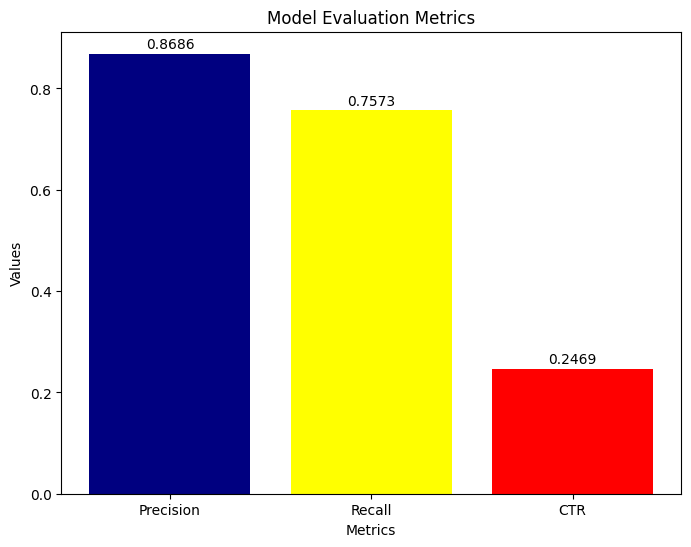

In [123]:
import matplotlib.pyplot as plt

# Precision, Recall, and CTR values
precision_value = avg_precision
recall_value = avg_recall
ctr_value = CTR

# Bar chart data
labels = ['Precision', 'Recall', 'CTR']
values = [precision_value, recall_value, ctr_value]

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['navy', 'yellow', 'red'])
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Model Evaluation Metrics')

# Display the values on top of each bar
for i, value in enumerate(values):
    plt.text(i, value + 0.01, str(round(value, 4)), ha='center')

# Show plot
plt.show()

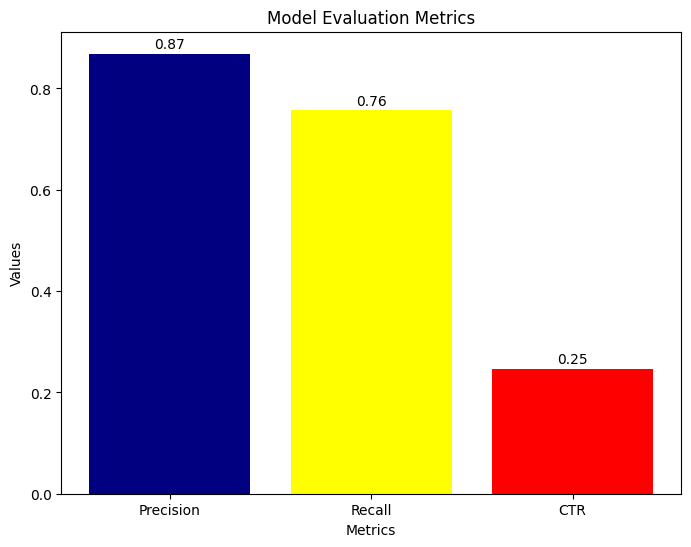

In [124]:
import matplotlib.pyplot as plt

# Precision, Recall, and CTR values
precision_value = avg_precision
recall_value = avg_recall
ctr_value = CTR

# Bar chart data
labels = ['Precision', 'Recall', 'CTR']
values = [precision_value, recall_value, ctr_value]

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['navy', 'yellow', 'red'])
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Model Evaluation Metrics')

# Display the values on top of each bar with 2 decimal places
for i, value in enumerate(values):
    plt.text(i, value + 0.01, "{:.2f}".format(value), ha='center')

# Show plot
plt.show()

# Traditional Collaborative Filtering

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score
from sklearn.neighbors import NearestNeighbors

# Assuming df contains the DataFrame with user-item interactions
# Assuming we have a user-item matrix where rows are users and columns are items
# Here, we'll use a simple nearest neighbors approach for collaborative filtering

# Replace NaN values with 0
user_item_matrix = df.pivot_table(index='User ID', columns='Product ID', values='Quantity Ordered', fill_value=0)

# Initialize the Nearest Neighbors model
k = 5  # Number of neighbors to consider
nn_model = NearestNeighbors(n_neighbors=k, metric='cosine')

# Fit the model to the user-item matrix
nn_model.fit(user_item_matrix)

NearestNeighbors(metric='cosine')

In [126]:
def recommend_items(user_id, n=10):
    # Get the index of the user in the user-item matrix
    user_index = user_item_matrix.index.get_loc(user_id)
    # Find the k nearest neighbors
    distances, indices = nn_model.kneighbors(user_item_matrix.iloc[user_index, :].values.reshape(1, -1))
    # Combine items purchased by the neighbors
    recommended_items = set()
    for idx in indices.flatten():
        recommended_items.update(user_item_matrix.iloc[idx, :].to_numpy().nonzero()[0])  # Correction made here
    # Remove items already purchased by the user
    recommended_items -= set(user_item_matrix.iloc[user_index, :].to_numpy().nonzero()[0])  # Correction made here
    # Convert indices to actual item IDs
    recommended_items = [user_item_matrix.columns[idx] for idx in recommended_items]
    # Return top n recommended items
    return recommended_items[:n]

# Function to calculate precision
def calculate_precision(actual_items, recommended_items):
    true_positives = len(set(actual_items) & set(recommended_items))
    false_positives = len(recommended_items) - true_positives
    if true_positives + false_positives > 0:
        precision = true_positives / (true_positives + false_positives)
    else:
        precision = 0
    return precision

# Function to calculate recall
def calculate_recall(actual_items, recommended_items):
    true_positives = len(set(actual_items) & set(recommended_items))
    false_negatives = len(set(actual_items) - set(recommended_items))
    if true_positives + false_negatives > 0:
        recall = true_positives / (true_positives + false_negatives)
    else:
        recall = 0
    return recall

In [127]:
# Assuming you have ground truth actual_items and recommended_items
# Replace 'your_user_id_here' with the actual user ID for whom you want to generate the list of actual items purchased
user_id = 12
actual_items_df = df[df['User ID'] == user_id]['Product ID']
actual_items = actual_items_df.tolist()

# Get recommended items for the user
recommended_items = recommend_items(user_id)

# Calculate precision and recall
precision = calculate_precision(actual_items, recommended_items)
recall = calculate_recall(actual_items, recommended_items)

# Print precision and recall
print("Precision:", precision)
print("Recall:", recall)

Precision: 0
Recall: 0.0


In [128]:
# Create a user-item matrix (rows = customers, columns = items)
user_item_matrix = df.pivot_table(index='User ID', columns='Product ID', values='Quantity Ordered', fill_value=0)
user_item_matrix

Product ID,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
User ID,,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140783,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
140784,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
140785,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [129]:
from sklearn.metrics.pairwise import pairwise_distances

# Convert DataFrame to numpy array
user_item_array = user_item_matrix.to_numpy()

# Calculate the item-item Jaccard similarity using pairwise_distances
item_item_similarity = 1 - pairwise_distances(user_item_array.T, metric='jaccard')

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/pairwise.py:2317: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


# Creating Product Recommendation Function

In [130]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Function to generate product recommendations using the recommendation system
def generate_recommendations(target_user_id, model, all_product_ids, df):
    # Retrieve the user's interactions or purchase history from your dataset
    user_interactions = df[df['User ID'] == target_user_id]['Product ID'].unique()

    # Filter out products that the user has already interacted with
    uninteracted_products = np.setdiff1d(all_product_ids, user_interactions)

    # Reshape input data if necessary
    user_ids = np.full_like(uninteracted_products, target_user_id)
    user_ids = user_ids.reshape((-1, 1))  # Assuming user_ids is a 1D array
    uninteracted_products = uninteracted_products.reshape((-1, 1))  # Assuming uninteracted_products is a 1D array

    # Predict the interaction probabilities for uninteracted products
    predicted_interactions = model.predict([user_ids, uninteracted_products])

    # Combine the predictions with the uninteracted products
    recommendations_df = pd.DataFrame({'User ID': user_ids.flatten(), 'Product ID': uninteracted_products.flatten(), 'Predicted Interaction': predicted_interactions.flatten()})

    # Sort the recommendations by predicted interaction probabilities
    sorted_recommendations = recommendations_df.sort_values(by='Predicted Interaction', ascending=False)

    # Select the top N recommendations
    N = 5  # Number of recommendations to generate
    top_recommendations = sorted_recommendations.head(N)

    return top_recommendations

# Creating a new dataset with all the pre-processed data of the df dataset 

In [131]:
# Specify the file path where you want to save the modified dataset
output_file_path = "/Users/engyamr/Downloads/Python/output_dataset.csv"

# Save the modified dataset to a new CSV file
df.to_csv(output_file_path, index=False)

# Confirm the file has been saved
print(f"Dataset saved to: {output_file_path}")

Dataset saved to: /Users/engyamr/Downloads/Python/output_dataset.csv


In [132]:
df_output= pd.read_csv("/Users/engyamr/Downloads/Python/output_dataset.csv")
df_output.head()

,Order ID,Product,Product_ean,Category,Purchase Address,Quantity Ordered,Price Each,Cost price,turnover,margin,Year,Month,Total Sales,User ID,Product ID,Is Repeated
0,141234,iPhone,5.638009e+12,Smart Phones,"944 Walnut St, Boston, MA 02215",1,700.00,231.0000,700.00,469.0000,2019,2019-01,700.00,1,1,False
1,141235,Lightning Charging Cable,5.563320e+12,Charging Cables,"185 Maple St, Portland, OR 97035",1,14.95,7.4750,14.95,7.4750,2019,2019-01,14.95,2,2,False
2,141236,Wired Headphones,2.113973e+12,Headphones,"538 Adams St, San Francisco, CA 94016",2,11.99,5.9950,23.98,11.9900,2019,2019-01,23.98,3,3,False
3,141237,27in FHD Monitor,3.069157e+12,Smart Tv,"738 10th St, Los Angeles, CA 90001",1,149.99,97.4935,149.99,52.4965,2019,2019-01,149.99,4,4,False
4,141238,Wired Headphones,9.692681e+12,Headphones,"387 10th St, Austin, TX 73301",1,11.99,5.9950,11.99,5.9950,2019,2019-01,11.99,5,3,True


# Console Chatbot

Successful Console Chatbot

Changing Product ID to Product name

In [133]:
# Get all unique product IDs along with their corresponding product names
unique_product_ids_names = df.groupby('Product ID')['Product'].first().reset_index()

# Display the unique product IDs with their names
print(unique_product_ids_names)

    Product ID                     Product
0            1                      iPhone
1            2    Lightning Charging Cable
2            3            Wired Headphones
3            4            27in FHD Monitor
4            5      AAA Batteries (4-pack)
5            6      27in 4K Gaming Monitor
6            7        USB-C Charging Cable
7            8  Bose SoundSport Headphones
8            9    Apple Airpods Headphones
9           10          Macbook Pro Laptop
10          11               Flatscreen TV
11          12             Vareebadd Phone
12          13       AA Batteries (4-pack)
13          14                Google Phone
14          15                20in Monitor
15          16      34in Ultrawide Monitor
16          17             ThinkPad Laptop
17          18                    LG Dryer
18          19          LG Washing Machine


In [134]:
import warnings
warnings.filterwarnings("ignore", message="Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables.")

Console chatbot with Product names instead of Product IDs

# Chatbot Interface

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import model_from_json
import tensorflow as tf

def get_recommendations(user_id, model, all_product_ids, df, product_names, N=5):
    # Retrieve the user's interactions or purchase history from your dataset
    user_interactions = df[df['User ID'] == user_id]['Product ID'].unique()

    # Filter out products that the user has already interacted with
    uninteracted_products = np.setdiff1d(all_product_ids, user_interactions)

    # Reshape input data if necessary
    user_ids = np.full_like(uninteracted_products, user_id)
    user_ids = user_ids.reshape((-1, 1))  # Assuming user_ids is a 1D array
    uninteracted_products = uninteracted_products.reshape((-1, 1))  # Assuming uninteracted_products is a 1D array

    # Convert arrays to tensors
    user_ids_tensor = tf.convert_to_tensor(user_ids, dtype=tf.float32)
    uninteracted_products_tensor = tf.convert_to_tensor(uninteracted_products, dtype=tf.float32)

    # Predict the interaction probabilities for uninteracted products
    predicted_interactions = model.predict([user_ids_tensor, uninteracted_products_tensor])

    # Combine the predictions with the uninteracted products
    recommendations_df = pd.DataFrame({'User ID': user_ids.flatten(), 'Product ID': uninteracted_products.flatten(), 'Predicted Interaction': predicted_interactions.flatten()})

    # Sort the recommendations by predicted interaction probabilities
    sorted_recommendations = recommendations_df.sort_values(by='Predicted Interaction', ascending=False)

    # Select the top N recommendations
    top_recommendations = sorted_recommendations.head(N).copy()  # Create a copy of the DataFrame

    # Merge with product names
    top_recommendations['Product Name'] = top_recommendations['Product ID'].map(product_names)

    return top_recommendations[['Product Name', 'Predicted Interaction']]

# Function to simulate chatbot responses
def chatbot_response(user_input):
    # Example responses
    responses = [
        "Hello! How can I assist you today?",
        "Hi there! What can I help you with?",
        "Welcome! How may I be of service?",
        "Hey! What do you need help with?",
    ]
    return np.random.choice(responses)

# Function to simulate chatbot interaction
def chatbot_interaction(df):
    print("Chatbot: Hello! How can I assist you today?")
    
    # Check if 'User ID' column is present in the DataFrame
    if 'User ID' not in df.columns:
        print("Chatbot: 'User ID' column not found in the dataset.")
        return
    
    # Flag to track if user requested recommendations
    requested_recommendations = False
    
    # Simulate conversation loop
    while True:
        # Check if user has requested recommendations
        if not requested_recommendations:
            user_input = input("User: ")
            
            # Check if user wants recommendations
            if "recommend" in user_input.lower():
                requested_recommendations = True
                print("Chatbot: Sure! Please provide your user ID.")
                continue  # Skip to next iteration to wait for user ID
        
        # Ask for user ID if recommendations are requested
        if requested_recommendations:
            user_id = input("User: Please provide your user ID: ")
            try:
                user_id = int(user_id)
            except ValueError:
                print("Chatbot: Please enter a valid user ID.")
                continue
            
            # Load the model architecture from JSON
            with open("model.json", "r") as json_file:
                loaded_model_json = json_file.read()
            model = model_from_json(loaded_model_json)
            
            # Load the model weights
            model.load_weights("model_weights.weights.h5")
            
            # Product names dictionary mapping product IDs to their real names
            product_names = {
                1: 'iPhone',
                2: 'Lightning Charging Cable',
                3: 'Wired Headphones',
                4: '27in FHD Monitor',
                5: 'AAA Batteries (4-pack)',
                6: '27in 4K Gaming Monitor',
                7: 'USB-C Charging Cable',
                8: 'Bose SoundSport Headphones',
                9: 'Apple Airpods Headphones',
                10: 'Macbook Pro Laptop',
                11: 'Flatscreen TV',
                12: 'Vareebadd Phone',
                13: 'AA Batteries (4-pack)',
                14: 'Google Phone',
                15: '20in Monitor',
                16: '34in Ultrawide Monitor',
                17: 'ThinkPad Laptop',
                18: 'LG Dryer',
                19: 'LG Washing Machine',
                # Add more product IDs and names as needed
            }

            # Get all unique product IDs from the DataFrame
            all_product_ids = df['Product ID'].unique()

            # Once valid user ID is provided, generate recommendations
            recommendations = get_recommendations(user_id, model, all_product_ids, df, product_names)
            print("Chatbot: Here are some personalized product recommendations for you:")
            print(recommendations.to_string(index=False))  # Print recommendations without index
            
            # End conversation after providing recommendations
            print("Chatbot: Is there anything else I can assist you with?")
            break  # End conversation
        
        # If user does not request recommendations, respond with a greeting or generic response
        response = chatbot_response(user_input)
        print("Chatbot:", response)

# Run the chatbot interaction
if __name__ == "__main__":
    # Load your dataset containing user interactions
    df = pd.read_csv('output_dataset.csv')
    chatbot_interaction(df)

In [ ]:
pip install --upgrade pillow

# Final Chatbot Interface Model

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import model_from_json
import tensorflow as tf
import tkinter as tk
from tkinter import scrolledtext
from PIL import Image, ImageTk

def get_recommendations(user_id, model, all_product_ids, df, product_names, N=5):
    # Retrieve the user's interactions or purchase history from your dataset
    user_interactions = df[df['User ID'] == user_id]['Product ID'].unique()

    # Filter out products that the user has already interacted with
    uninteracted_products = np.setdiff1d(all_product_ids, user_interactions)

    # Reshape input data if necessary
    user_ids = np.full_like(uninteracted_products, user_id)
    user_ids = user_ids.reshape((-1, 1))  # Assuming user_ids is a 1D array
    uninteracted_products = uninteracted_products.reshape((-1, 1))  # Assuming uninteracted_products is a 1D array

    # Convert arrays to tensors
    user_ids_tensor = tf.convert_to_tensor(user_ids, dtype=tf.float32)
    uninteracted_products_tensor = tf.convert_to_tensor(uninteracted_products, dtype=tf.float32)

    # Predict the interaction probabilities for uninteracted products
    predicted_interactions = model.predict([user_ids_tensor, uninteracted_products_tensor])

    # Combine the predictions with the uninteracted products
    recommendations_df = pd.DataFrame({'User ID': user_ids.flatten(), 'Product ID': uninteracted_products.flatten(), 'Predicted Interaction': predicted_interactions.flatten()})

    # Sort the recommendations by predicted interaction probabilities
    sorted_recommendations = recommendations_df.sort_values(by='Predicted Interaction', ascending=False)

    # Select the top N recommendations
    top_recommendations = sorted_recommendations.head(N).copy()  # Create a copy of the DataFrame

    # Merge with product names
    top_recommendations['Product Name'] = top_recommendations['Product ID'].map(product_names)

    return top_recommendations[['Product Name', 'Predicted Interaction']]

# Function to load and resize image
def load_and_resize_image(image_path, width, height):
    try:
        image = Image.open(image_path)
        image = image.resize((width, height))
        return ImageTk.PhotoImage(image)
    except FileNotFoundError:
        print("Image file not found.")
        return None

# Initialize conversation state
conversation_state = "INITIAL"

# Function to handle chatbot interaction
def handle_interaction(user_input):
    global requested_recommendations
    global conversation
    global df
    global conversation_state

    if conversation_state == "INITIAL":
        if "recommend" in user_input.lower():
            requested_recommendations = True
            conversation.insert(tk.END, "\nChatbot: Sure! Please provide your user ID.\n\n")
            conversation_state = "WAITING_FOR_USER_ID"
        else:
            conversation.insert(tk.END, "\nChatbot: Sorry, I did not quite get that. Can you please rephrase?\n\n")

    elif conversation_state == "WAITING_FOR_USER_ID":
        try:
            user_id = int(user_input)
            model = load_model()  # Load model outside to avoid loading it multiple times
            product_names = get_product_names()
            all_product_ids = df['Product ID'].unique()
            recommendations = get_recommendations(user_id, model, all_product_ids, df, product_names)
            conversation.insert(tk.END, "\nChatbot: Here are some product recommendations for you:\n\n")
            for index, row in recommendations.iterrows():
                conversation.insert(tk.END, f"{row['Product Name']: <40} {row['Predicted Interaction']}\n")
            conversation.insert(tk.END, "\nChatbot: Is there anything else I can assist you with? (Yes/No)\n\n")
            conversation_state = "WAITING_FOR_YES_OR_NO"
        except ValueError:
            conversation.insert(tk.END, "\nChatbot: Please enter a valid user ID.\n\n")

    elif conversation_state == "WAITING_FOR_YES_OR_NO":
        if "yes" in user_input.lower():
            conversation.insert(tk.END, "\nChatbot: Please provide your user ID.\n\n")
            conversation_state = "WAITING_FOR_USER_ID"
        elif "no" in user_input.lower():
            conversation.insert(tk.END, "\nChatbot: Thank you! If you need further assistance, feel free to ask.\n\n")
            conversation_state = "INITIAL"
        else:
            conversation.insert(tk.END, "\nChatbot: Sorry, I did not quite get that. Can you please rephrase?\n\n")

# Load model
def load_model():
    with open("model.json", "r") as json_file:
        loaded_model_json = json_file.read()
    model = model_from_json(loaded_model_json)
    model.load_weights("model_weights.weights.h5")
    return model

# Load product names
def get_product_names():
    product_names = {
        1: 'iPhone',
        2: 'Lightning Charging Cable',
        3: 'Wired Headphones',
        4: '27in FHD Monitor',
        5: 'AAA Batteries (4-pack)',
        6: '27in 4K Gaming Monitor',
        7: 'USB-C Charging Cable',
        8: 'Bose SoundSport Headphones',
        9: 'Apple Airpods Headphones',
        10: 'Macbook Pro Laptop',
        11: 'Flatscreen TV',
        12: 'Vareebadd Phone',
        13: 'AA Batteries (4-pack)',
        14: 'Google Phone',
        15: '20in Monitor',
        16: '34in Ultrawide Monitor',
        17: 'ThinkPad Laptop',
        18: 'LG Dryer',
        19: 'LG Washing Machine',
        # Add more product IDs and names as needed
    }
    return product_names

def send_message(event=None):
    user_input = text_input.get()
    conversation.insert(tk.END, "User: " + user_input + "\n")
    handle_interaction(user_input)
    text_input.delete(0, tk.END)

# Initialize Tkinter window
root = tk.Tk()
root.title("Chatbot")

# Set background color
root.configure(bg="white")

# Create text area for conversation
conversation = scrolledtext.ScrolledText(root, width=60, height=20, bg="#74D1EA", font=("Helvetica", 14), fg="black")  # Decrease font size
conversation.grid(row=0, column=0, padx=5, pady=5, sticky="nsew")
conversation.insert(tk.END, "\nChatbot: Hello! How can I assist you today?\n\n")
conversation.config(wrap=tk.WORD)  # Wrap text instead of using margins

# Load and resize the image
image_path = 'ChatbotLogo.png'  # Change this to the path of your image
image_width = 200
image_height = 200
image = load_and_resize_image(image_path, image_width, image_height)
if image:
    image_label = tk.Label(root, image=image, bg="white")
    image_label.image = image  # Keep a reference to prevent garbage collection
    image_label.grid(row=0, column=1, padx=5, pady=5, sticky="nsew")  # Position the image label to the right

# Create text input field
text_input = tk.Entry(root, width=50, font=("Helvetica", 10))
text_input.grid(row=1, column=0, padx=10, pady=10, sticky="ew")

# Create send button
send_button = tk.Button(root, text="Send", command=send_message, bg="light blue")  
send_button.grid(row=1, column=1, padx=1, pady=1, sticky="ew")

# Configure grid weights
root.rowconfigure(0, weight=1)
root.columnconfigure(0, weight=1)

# Bind Enter key to send_message function
root.bind('<Return>', send_message)

# Load your dataset containing user interactions
df = pd.read_csv('output_dataset.csv')

# Flag to track if user requested recommendations
requested_recommendations = False

# Initialize conversation state
conversation_state = "INITIAL"

# Run the Tkinter event loop
root.mainloop()

# Final Chatbot Interface

In [ ]:
pip install --upgrade pillow

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import model_from_json
import tensorflow as tf
import tkinter as tk
from tkinter import scrolledtext
from PIL import Image, ImageTk

def get_recommendations(user_id, model, all_product_ids, df, product_names, N=5):
    # Retrieve the user's interactions or purchase history from your dataset
    user_interactions = df[df['User ID'] == user_id]['Product ID'].unique()

    # Filter out products that the user has already interacted with
    uninteracted_products = np.setdiff1d(all_product_ids, user_interactions)

    # Reshape input data if necessary
    user_ids = np.full_like(uninteracted_products, user_id)
    user_ids = user_ids.reshape((-1, 1))  # Assuming user_ids is a 1D array
    uninteracted_products = uninteracted_products.reshape((-1, 1))  # Assuming uninteracted_products is a 1D array

    # Convert arrays to tensors
    user_ids_tensor = tf.convert_to_tensor(user_ids, dtype=tf.float32)
    uninteracted_products_tensor = tf.convert_to_tensor(uninteracted_products, dtype=tf.float32)

    # Predict the interaction probabilities for uninteracted products
    predicted_interactions = model.predict([user_ids_tensor, uninteracted_products_tensor])

    # Combine the predictions with the uninteracted products
    recommendations_df = pd.DataFrame({'User ID': user_ids.flatten(), 'Product ID': uninteracted_products.flatten(), 'Predicted Interaction': predicted_interactions.flatten()})

    # Sort the recommendations by predicted interaction probabilities
    sorted_recommendations = recommendations_df.sort_values(by='Predicted Interaction', ascending=False)

    # Select the top N recommendations
    top_recommendations = sorted_recommendations.head(N).copy()  # Create a copy of the DataFrame

    # Merge with product names
    top_recommendations['Product Name'] = top_recommendations['Product ID'].map(product_names)

    return top_recommendations[['Product Name', 'Predicted Interaction']]

# Function to load and resize image
def load_and_resize_image(image_path, width, height):
    try:
        image = Image.open(image_path)
        image = image.resize((width, height))
        return ImageTk.PhotoImage(image)
    except FileNotFoundError:
        print("Image file not found.")
        return None

# Initialize conversation state
conversation_state = "INITIAL"

# Function to handle chatbot interaction
def handle_interaction(user_input):
    global requested_recommendations
    global conversation
    global df
    global conversation_state

    if "recommend" in user_input.lower():
        if conversation_state == "INITIAL":
            requested_recommendations = True
            conversation.insert(tk.END, "\nChatbot: Sure! Please provide your user ID.\n\n")
            conversation_state = "WAITING_FOR_USER_ID"
        else:
            conversation.insert(tk.END, "\nChatbot: Sorry, I did not quite get that. Can you please rephrase?\n\n")

    elif conversation_state == "WAITING_FOR_USER_ID":
        try:
            user_id = int(user_input)
            model = load_model()  # Load model outside to avoid loading it multiple times
            product_names = get_product_names()
            all_product_ids = df['Product ID'].unique()
            recommendations = get_recommendations(user_id, model, all_product_ids, df, product_names)
            conversation.insert(tk.END, "\nChatbot: Here are some personalized product recommendations for you:\n\n")
            for index, row in recommendations.iterrows():
                conversation.insert(tk.END, f"{row['Product Name']: <40} {row['Predicted Interaction']}\n")
            conversation.insert(tk.END, "\nChatbot: Is there anything else I can assist you with? (Yes/No)\n\n")
            conversation_state = "WAITING_FOR_YES_OR_NO"
        except ValueError:
            conversation.insert(tk.END, "\nChatbot: Please enter a valid user ID.\n\n")

    elif conversation_state == "WAITING_FOR_YES_OR_NO":
        if "yes" in user_input.lower():
            conversation.insert(tk.END, "\nChatbot: Please provide your user ID.\n\n")
            conversation_state = "WAITING_FOR_USER_ID"
        elif "no" in user_input.lower():
            conversation.insert(tk.END, "\nChatbot: Thank you! If you need further assistance, feel free to ask.\n\n")
            conversation_state = "INITIAL"
        else:
            conversation.insert(tk.END, "\nChatbot: Sorry, I did not quite get that. Can you please rephrase?\n\n")

# Load model
def load_model():
    with open("model.json", "r") as json_file:
        loaded_model_json = json_file.read()
    model = model_from_json(loaded_model_json)
    model.load_weights("model_weights.weights.h5")
    return model

# Load product names
def get_product_names():
    product_names = {
        1: 'iPhone',
        2: 'Lightning Charging Cable',
        3: 'Wired Headphones',
        4: '27in FHD Monitor',
        5: 'AAA Batteries (4-pack)',
        6: '27in 4K Gaming Monitor',
        7: 'USB-C Charging Cable',
        8: 'Bose SoundSport Headphones',
        9: 'Apple Airpods Headphones',
        10: 'Macbook Pro Laptop',
        11: 'Flatscreen TV',
        12: 'Vareebadd Phone',
        13: 'AA Batteries (4-pack)',
        14: 'Google Phone',
        15: '20in Monitor',
        16: '34in Ultrawide Monitor',
        17: 'ThinkPad Laptop',
        18: 'LG Dryer',
        19: 'LG Washing Machine',
        # Add more product IDs and names as needed
    }
    return product_names

def send_message(event=None):
    user_input = text_input.get()
    conversation.insert(tk.END, "User: " + user_input + "\n")
    handle_interaction(user_input)
    text_input.delete(0, tk.END)

# Initialize Tkinter window
root = tk.Tk()
root.title("Chatbot")

# Set background color
root.configure(bg="white")

# Create text area for conversation
conversation = scrolledtext.ScrolledText(root, width=60, height=20, bg="#74D1EA", font=("San Francisco", 18), fg="black")  # Use San Francisco font
conversation.grid(row=0, column=0, padx=5, pady=5, sticky="nsew")
conversation.insert(tk.END, "\nChatbot: Hello! How can I assist you today?\n\n")
conversation.config(wrap=tk.WORD)  # Wrap text instead of using margins

# Load and resize the image
image_path = 'ChatbotLogo.png'  # Change this to the path of your image
image_width = 200
image_height = 200
image = load_and_resize_image(image_path, image_width, image_height)
if image:
    image_label = tk.Label(root, image=image, bg="white")
    image_label.image = image  # Keep a reference to prevent garbage collection
    image_label.grid(row=0, column=1, padx=5, pady=5, sticky="nsew")  # Position the image label to the right

# Create text input field
text_input = tk.Entry(root, width=50, font=("San Francisco", 18))  # Use San Francisco font
text_input.grid(row=1, column=0, padx=10, pady=10, sticky="ew")

# Create send button
send_button = tk.Button(root, text="Send", command=send_message, bg="light blue")  
send_button.grid(row=1, column=1, padx=1, pady=1, sticky="ew")

# Configure grid weights
root.rowconfigure(0, weight=1)
root.columnconfigure(0, weight=1)

# Bind Enter key to send_message function
root.bind('<Return>', send_message)

# Load your dataset containing user interactions
df = pd.read_csv('output_dataset.csv')

# Flag to track if user requested recommendations
requested_recommendations = False

# Initialize conversation state
conversation_state = "INITIAL"

# Run the Tkinter event loop
root.mainloop()

# Adding NLP

Text Preprocessing:

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word.lower() not in stopwords.words('english')]
    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return tokens

Intent Recognition:

In [ ]:
def predict_intent(text):
    # Use a trained model to predict intent
    # Example: return "recommendation" if the text contains keywords related to product recommendation
    if "recommend" in text.lower():
        return "recommendation"
    elif "help" in text.lower():
        return "help"
    else:
        return "unknown"

Entity Extraction:

In [ ]:
pip install spacy

In [ ]:
import spacy

def extract_entities(text):
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import model_from_json
import tensorflow as tf
import tkinter as tk
from tkinter import scrolledtext
from PIL import Image, ImageTk
import re

def get_recommendations(user_id, model, all_product_ids, df, product_names, N=5):
    # Retrieve the user's interactions or purchase history from your dataset
    user_interactions = df[df['User ID'] == user_id]['Product ID'].unique()

    # Filter out products that the user has already interacted with
    uninteracted_products = np.setdiff1d(all_product_ids, user_interactions)

    # Reshape input data if necessary
    user_ids = np.full_like(uninteracted_products, user_id)
    user_ids = user_ids.reshape((-1, 1))  # Assuming user_ids is a 1D array
    uninteracted_products = uninteracted_products.reshape((-1, 1))  # Assuming uninteracted_products is a 1D array

    # Convert arrays to tensors
    user_ids_tensor = tf.convert_to_tensor(user_ids, dtype=tf.float32)
    uninteracted_products_tensor = tf.convert_to_tensor(uninteracted_products, dtype=tf.float32)

    # Predict the interaction probabilities for uninteracted products
    predicted_interactions = model.predict([user_ids_tensor, uninteracted_products_tensor])

    # Combine the predictions with the uninteracted products
    recommendations_df = pd.DataFrame({'User ID': user_ids.flatten(), 'Product ID': uninteracted_products.flatten(), 'Predicted Interaction': predicted_interactions.flatten()})

    # Sort the recommendations by predicted interaction probabilities
    sorted_recommendations = recommendations_df.sort_values(by='Predicted Interaction', ascending=False)

    # Select the top N recommendations
    top_recommendations = sorted_recommendations.head(N).copy()  # Create a copy of the DataFrame

    # Merge with product names
    top_recommendations['Product Name'] = top_recommendations['Product ID'].map(product_names)

    return top_recommendations[['Product Name', 'Predicted Interaction']]

# Function to extract user ID from the sentence using regex
def extract_user_id(text):
    match = re.search(r'\b\d+\b', text)
    if match:
        return int(match.group())
    return None

# Function to handle chatbot interaction
def handle_interaction(user_input):
    global requested_recommendations
    global conversation
    global df
    global conversation_state

    if "recommend" in user_input.lower():
        if conversation_state == "INITIAL":
            requested_recommendations = True
            conversation.insert(tk.END, "\nChatbot: Sure! Please provide your user ID.\n\n")
            conversation_state = "WAITING_FOR_USER_ID"
        else:
            conversation.insert(tk.END, "\nChatbot: Sorry, I did not quite get that. Can you please rephrase?\n\n")

    elif conversation_state == "WAITING_FOR_USER_ID":
        user_id = extract_user_id(user_input)
        if user_id:
            model = load_model()  # Load model outside to avoid loading it multiple times
            product_names = get_product_names()
            all_product_ids = df['Product ID'].unique()
            recommendations = get_recommendations(user_id, model, all_product_ids, df, product_names)
            conversation.insert(tk.END, "\nChatbot: Here are some personalized product recommendations for you:\n\n")
            for index, row in recommendations.iterrows():
                conversation.insert(tk.END, f"{row['Product Name']: <40} {row['Predicted Interaction']}\n")
            conversation.insert(tk.END, "\nChatbot: Is there anything else I can assist you with? (Yes/No)\n\n")
            conversation_state = "WAITING_FOR_YES_OR_NO"
        else:
            conversation.insert(tk.END, "\nChatbot: Please enter a valid user ID.\n\n")

    elif conversation_state == "WAITING_FOR_YES_OR_NO":
        if "yes" in user_input.lower():
            conversation.insert(tk.END, "\nChatbot: Please provide your user ID.\n\n")
            conversation_state = "WAITING_FOR_USER_ID"
        elif "no" in user_input.lower():
            conversation.insert(tk.END, "\nChatbot: Thank you! If you need further assistance, feel free to ask.\n\n")
            conversation_state = "INITIAL"
        else:
            conversation.insert(tk.END, "\nChatbot: Sorry, I did not quite get that. Can you please rephrase?\n\n")

# Load model
def load_model():
    with open("model.json", "r") as json_file:
        loaded_model_json = json_file.read()
    model = model_from_json(loaded_model_json)
    model.load_weights("model_weights.weights.h5")
    return model

# Load product names
def get_product_names():
    product_names = {
        1: 'iPhone',
        2: 'Lightning Charging Cable',
        3: 'Wired Headphones',
        4: '27in FHD Monitor',
        5: 'AAA Batteries (4-pack)',
        6: '27in 4K Gaming Monitor',
        7: 'USB-C Charging Cable',
        8: 'Bose SoundSport Headphones',
        9: 'Apple Airpods Headphones',
        10: 'Macbook Pro Laptop',
        11: 'Flatscreen TV',
        12: 'Vareebadd Phone',
        13: 'AA Batteries (4-pack)',
        14: 'Google Phone',
        15: '20in Monitor',
        16: '34in Ultrawide Monitor',
        17: 'ThinkPad Laptop',
        18: 'LG Dryer',
        19: 'LG Washing Machine',
        # Add more product IDs and names as needed
    }
    return product_names

def send_message(event=None):
    user_input = text_input.get()
    conversation.insert(tk.END, "User: " + user_input + "\n")
    handle_interaction(user_input)
    text_input.delete(0, tk.END)

# Initialize Tkinter window
root = tk.Tk()
root.title("Chatbot")

# Set background color
root.configure(bg="white")

# Create text area for conversation
conversation = scrolledtext.ScrolledText(root, width=60, height=20, bg="#74D1EA", font=("San Francisco", 18), fg="black")  # Use San Francisco font
conversation.grid(row=0, column=0, padx=5, pady=5, sticky="nsew")
conversation.insert(tk.END, "\nChatbot: Hello! How can I assist you today?\n\n")
conversation.config(wrap=tk.WORD)  # Wrap text instead of using margins

# Load and resize the image
image_path = 'ChatbotLogo.png'  # Change this to the path of your image
image_width = 200
image_height = 200
image = load_and_resize_image(image_path, image_width, image_height)
if image:
    image_label = tk.Label(root, image=image, bg="white")
    image_label.image = image  # Keep a reference to prevent garbage collection
    image_label.grid(row=0, column=1, padx=5, pady=5, sticky="nsew")  # Position the image label to the right

# Create text input field
text_input = tk.Entry(root, width=50, font=("San Francisco", 18))  # Use San Francisco font
text_input.grid(row=1, column=0, padx=10, pady=10, sticky="ew")

# Create send button
send_button = tk.Button(root, text="Send", command=send_message, bg="light blue")  
send_button.grid(row=1, column=1, padx=1, pady=1, sticky="ew")

# Configure grid weights
root.rowconfigure(0, weight=1)
root.columnconfigure(0, weight=1)

# Bind Enter key to send_message function
root.bind('<Return>', send_message)

# Load your dataset containing user interactions
df = pd.read_csv('output_dataset.csv')

# Flag to track if user requested recommendations
requested_recommendations = False

# Initialize conversation state
conversation_state = "INITIAL"

# Run the Tkinter event loop
root.mainloop()

# Products

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import model_from_json
import tensorflow as tf
import tkinter as tk
from tkinter import scrolledtext
from PIL import Image, ImageTk
import re

categories = {
    'Batteries': ['AAA Batteries (4-pack)', 'AA Batteries (4-pack)'],
    'Headphones': ['Wired Headphones', 'Apple Airpods Headphones', 'Bose SoundSport Headphones'],
    'Smart TV': ['27in FHD Monitor', '27in 4K Gaming Monitor', '34in Ultrawide Monitor', 'Flatscreen TV', '20in Monitor'],
    'Smart Phones': ['iPhone', 'Google Phone', 'Vareebadd Phone'],
    'Laptops': ['Macbook Pro Laptop', 'ThinkPad Laptop'],
    'Cleaning Machines': ['LG Washing Machine', 'LG Dryer']
}

def get_recommendations(user_id, model, all_product_ids, df, product_names, N=5):
    # Retrieve the user's interactions or purchase history from your dataset
    user_interactions = df[df['User ID'] == user_id]['Product ID'].unique()

    # Filter out products that the user has already interacted with
    uninteracted_products = np.setdiff1d(all_product_ids, user_interactions)

    # Reshape input data if necessary
    user_ids = np.full_like(uninteracted_products, user_id)
    user_ids = user_ids.reshape((-1, 1))  # Assuming user_ids is a 1D array
    uninteracted_products = uninteracted_products.reshape((-1, 1))  # Assuming uninteracted_products is a 1D array

    # Convert arrays to tensors
    user_ids_tensor = tf.convert_to_tensor(user_ids, dtype=tf.float32)
    uninteracted_products_tensor = tf.convert_to_tensor(uninteracted_products, dtype=tf.float32)

    # Predict the interaction probabilities for uninteracted products
    predicted_interactions = model.predict([user_ids_tensor, uninteracted_products_tensor])

    # Combine the predictions with the uninteracted products
    recommendations_df = pd.DataFrame({'User ID': user_ids.flatten(), 'Product ID': uninteracted_products.flatten(), 'Predicted Interaction': predicted_interactions.flatten()})

    # Sort the recommendations by predicted interaction probabilities
    sorted_recommendations = recommendations_df.sort_values(by='Predicted Interaction', ascending=False)

    # Select the top N recommendations
    top_recommendations = sorted_recommendations.head(N).copy()  # Create a copy of the DataFrame

    # Merge with product names
    top_recommendations['Product Name'] = top_recommendations['Product ID'].map(product_names)

    return top_recommendations[['Product Name', 'Predicted Interaction']]

# Function to extract user ID from the sentence using regex
def extract_user_id(text):
    match = re.search(r'\b\d+\b', text)
    if match:
        return int(match.group())
    return None

# Function to handle chatbot interaction
def handle_interaction(user_input):
    global requested_recommendations
    global conversation
    global df
    global conversation_state

    # Check if the user input contains any product names or categories
    product_names = get_product_names().values()
    product_categories = categories.keys()
    mentioned_products = [product for product in product_names if product.lower() in user_input.lower()]
    mentioned_categories = [category for category in product_categories if category.lower() in user_input.lower()]

    if mentioned_products or mentioned_categories:
        conversation.insert(tk.END, "\nChatbot: Here are the available products:\n\n")
        if mentioned_categories:
            for category in mentioned_categories:
                conversation.insert(tk.END, f"{category}: {', '.join(categories[category])}\n")
        if mentioned_products:
            conversation.insert(tk.END, f"Products: {', '.join(mentioned_products)}\n")
        conversation.insert(tk.END, "\nChatbot: Is there anything else I can assist you with? (Yes/No)\n\n")
        conversation_state = "WAITING_FOR_USER_NEEDS"
        return

    if "recommend" in user_input.lower():
        if conversation_state == "INITIAL":
            requested_recommendations = True
            conversation.insert(tk.END, "\nChatbot: Sure! Please provide your user ID.\n\n")
            conversation_state = "WAITING_FOR_USER_ID"
        else:
            conversation.insert(tk.END, "\nChatbot: Sorry, I did not quite get that. Can you please rephrase?\n\n")

    elif conversation_state == "WAITING_FOR_USER_ID":
        user_id = extract_user_id(user_input)
        if user_id:
            model = load_model()  # Load model outside to avoid loading it multiple times
            product_names = get_product_names()
            all_product_ids = df['Product ID'].unique()
            recommendations = get_recommendations(user_id, model, all_product_ids, df, product_names)
            conversation.insert(tk.END, "\nChatbot: Here are some personalized product recommendations for you:\n\n")
            for index, row in recommendations.iterrows():
                conversation.insert(tk.END, f"{row['Product Name']: <40} {row['Predicted Interaction']}\n")
            conversation.insert(tk.END, "\nChatbot: Is there anything else I can assist you with? (Yes/No)\n\n")
            conversation_state = "WAITING_FOR_YES_OR_NO"
        else:
            conversation.insert(tk.END, "\nChatbot: Please enter a valid user ID.\n\n")

    elif conversation_state == "WAITING_FOR_YES_OR_NO":
        if "yes" in user_input.lower():
            conversation.insert(tk.END, "\nChatbot: Do you want product recommendations? (Yes/No)\n\n")
            conversation_state = "WAITING_FOR_RECOMMENDATION_DECISION"
        elif "no" in user_input.lower():
            conversation.insert(tk.END, "\nChatbot: Thank you! If you need further assistance, feel free to ask.\n\n")
            conversation_state = "INITIAL"
        else:
            conversation.insert(tk.END, "\nChatbot: Sorry, I did not quite get that. Can you please rephrase?\n\n")

    elif conversation_state == "WAITING_FOR_USER_NEEDS":
        if "yes" in user_input.lower():
            conversation.insert(tk.END, "\nChatbot: Please provide your user ID.\n\n")
            conversation_state = "WAITING_FOR_USER_ID"
        elif "no" in user_input.lower():
            conversation.insert(tk.END, "\nChatbot: Thank you! If you need further assistance, feel free to ask.\n\n")
            conversation_state = "INITIAL"
        else:
            conversation.insert(tk.END, "\nChatbot: Sorry, I did not quite get that. Can you please rephrase?\n\n")

    elif conversation_state == "WAITING_FOR_RECOMMENDATION_DECISION":
        if "yes" in user_input.lower():
            conversation.insert(tk.END, "\nChatbot: Please provide your user ID.\n\n")
            conversation_state = "WAITING_FOR_USER_ID"
        elif "no" in user_input.lower():
            conversation.insert(tk.END, "\nChatbot: Thank you! If you need further assistance, feel free to ask.\n\n")
            conversation_state = "INITIAL"
        else:
            conversation.insert(tk.END, "\nChatbot: Sorry, I did not quite get that. Can you please rephrase?\n\n")

# Load model
def load_model():
    with open("model.json", "r") as json_file:
        loaded_model_json = json_file.read()
    model = model_from_json(loaded_model_json)
    model.load_weights("model_weights.weights.h5")
    return model

# Load product names
def get_product_names():
    product_names = {
        1: 'iPhone',
        2: 'Lightning Charging Cable',
        3: 'Wired Headphones',
        4: '27in FHD Monitor',
        5: 'AAA Batteries (4-pack)',
        6: '27in 4K Gaming Monitor',
        7: 'USB-C Charging Cable',
        8: 'Bose SoundSport Headphones',
        9: 'Apple Airpods Headphones',
        10: 'Macbook Pro Laptop',
        11: 'Flatscreen TV',
        12: 'Vareebadd Phone',
        13: 'AA Batteries (4-pack)',
        14: 'Google Phone',
        15: '20in Monitor',
        16: '34in Ultrawide Monitor',
        17: 'ThinkPad Laptop',
        18: 'LG Dryer',
        19: 'LG Washing Machine',
        # Add more product IDs and names as needed
    }
    return product_names

def send_message(event=None):
    user_input = text_input.get()
    conversation.insert(tk.END, "User: " + user_input + "\n")
    handle_interaction(user_input)
    text_input.delete(0, tk.END)

# Initialize Tkinter window
root = tk.Tk()
root.title("Chatbot")

# Set background color
root.configure(bg="white")

# Create text area for conversation
conversation = scrolledtext.ScrolledText(root, width=60, height=20, bg="#74D1EA", font=("San Francisco", 18), fg="black")  # Use San Francisco font
conversation.grid(row=0, column=0, padx=5, pady=5, sticky="nsew")
conversation.insert(tk.END, "\nChatbot: Hello! How can I assist you today?\n\n")
conversation.config(wrap=tk.WORD)  # Wrap text instead of using margins

# Create text input field
text_input = tk.Entry(root, width=50, font=("San Francisco", 18))  # Use San Francisco font
text_input.grid(row=1, column=0, padx=10, pady=10, sticky="ew")

# Create send button
send_button = tk.Button(root, text="Send", command=send_message, bg="light blue")  
send_button.grid(row=1, column=1, padx=1, pady=1, sticky="ew")

# Configure grid weights
root.rowconfigure(0, weight=1)
root.columnconfigure(0, weight=1)

# Bind Enter key to send_message function
root.bind('<Return>', send_message)

# Load your dataset containing user interactions
df = pd.read_csv('output_dataset.csv')

# Flag to track if user requested recommendations
requested_recommendations = False

# Initialize conversation state
conversation_state = "INITIAL"

# Run the Tkinter event loop
root.mainloop()

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import model_from_json
import tensorflow as tf
import tkinter as tk
from tkinter import scrolledtext
from PIL import Image, ImageTk
import re

categories = {
    'Batteries': ['AAA Batteries (4-pack)', 'AA Batteries (4-pack)'],
    'Headphones': ['Wired Headphones', 'Apple Airpods Headphones', 'Bose SoundSport Headphones'],
    'Smart TV': ['27in FHD Monitor', '27in 4K Gaming Monitor', '34in Ultrawide Monitor', 'Flatscreen TV', '20in Monitor'],
    'Smart Phones': ['iPhone', 'Google Phone', 'Vareebadd Phone'],
    'Laptops': ['Macbook Pro Laptop', 'ThinkPad Laptop'],
    'Cleaning Machines': ['LG Washing Machine', 'LG Dryer']
}

def get_recommendations(user_id, model, all_product_ids, df, product_names, N=5):
    # Retrieve the user's interactions or purchase history from your dataset
    user_interactions = df[df['User ID'] == user_id]['Product ID'].unique()

    # Filter out products that the user has already interacted with
    uninteracted_products = np.setdiff1d(all_product_ids, user_interactions)

    # Reshape input data if necessary
    user_ids = np.full_like(uninteracted_products, user_id)
    user_ids = user_ids.reshape((-1, 1))  # Assuming user_ids is a 1D array
    uninteracted_products = uninteracted_products.reshape((-1, 1))  # Assuming uninteracted_products is a 1D array

    # Convert arrays to tensors
    user_ids_tensor = tf.convert_to_tensor(user_ids, dtype=tf.float32)
    uninteracted_products_tensor = tf.convert_to_tensor(uninteracted_products, dtype=tf.float32)

    # Predict the interaction probabilities for uninteracted products
    predicted_interactions = model.predict([user_ids_tensor, uninteracted_products_tensor])

    # Combine the predictions with the uninteracted products
    recommendations_df = pd.DataFrame({'User ID': user_ids.flatten(), 'Product ID': uninteracted_products.flatten(), 'Predicted Interaction': predicted_interactions.flatten()})

    # Sort the recommendations by predicted interaction probabilities
    sorted_recommendations = recommendations_df.sort_values(by='Predicted Interaction', ascending=False)

    # Select the top N recommendations
    top_recommendations = sorted_recommendations.head(N).copy()  # Create a copy of the DataFrame

    # Merge with product names
    top_recommendations['Product Name'] = top_recommendations['Product ID'].map(product_names)

    return top_recommendations[['Product Name', 'Predicted Interaction']]

# Function to extract user ID from the sentence using regex
def extract_user_id(text):
    match = re.search(r'\b\d+\b', text)
    if match:
        return int(match.group())
    return None

# Function to handle chatbot interaction
def handle_interaction(user_input):
    global requested_recommendations
    global conversation
    global df
    global conversation_state

    # Check if the user input contains any product names or categories
    product_names = get_product_names().values()
    product_categories = categories.keys()
    mentioned_products = [product for product in product_names if product.lower() in user_input.lower()]
    mentioned_categories = [category for category in product_categories if category.lower() in user_input.lower()]

    if mentioned_products or mentioned_categories:
        conversation.insert(tk.END, "\nChatbot: Here are the available products:\n\n")
        if mentioned_categories:
            for category in mentioned_categories:
                conversation.insert(tk.END, f"{category}: {', '.join(categories[category])}\n")
        if mentioned_products:
            conversation.insert(tk.END, f"Products: {', '.join(mentioned_products)}\n")
        conversation.insert(tk.END, "\nChatbot: Is there anything else I can assist you with? (Yes/No)\n\n")
        conversation_state = "WAITING_FOR_USER_NEEDS"
        return

    if "recommend" in user_input.lower():
        if conversation_state == "INITIAL":
            requested_recommendations = True
            conversation.insert(tk.END, "\nChatbot: Sure! Please provide your user ID.\n\n")
            conversation_state = "WAITING_FOR_USER_ID"
        else:
            conversation.insert(tk.END, "\nChatbot: Sorry, I did not quite get that. Can you please rephrase?\n\n")

    elif conversation_state == "WAITING_FOR_USER_ID":
        user_id = extract_user_id(user_input)
        if user_id:
            model = load_model()  # Load model outside to avoid loading it multiple times
            product_names = get_product_names()
            all_product_ids = df['Product ID'].unique()
            recommendations = get_recommendations(user_id, model, all_product_ids, df, product_names)
            conversation.insert(tk.END, "\nChatbot: Here are some personalized product recommendations for you:\n\n")
            for index, row in recommendations.iterrows():
                conversation.insert(tk.END, f"{row['Product Name']: <40} {row['Predicted Interaction']}\n")
            conversation.insert(tk.END, "\nChatbot: Is there anything else I can assist you with? (Yes/No)\n\n")
            conversation_state = "WAITING_FOR_YES_OR_NO"
        else:
            conversation.insert(tk.END, "\nChatbot: Please enter a valid user ID.\n\n")

    elif conversation_state == "WAITING_FOR_YES_OR_NO":
        if "yes" in user_input.lower():
            conversation.insert(tk.END, "\nChatbot: Do you want product recommendations or want to ask about products? (Recommendations/Products)\n\n")
            conversation_state = "WAITING_FOR_RECOMMENDATION_OR_PRODUCT"
        elif "no" in user_input.lower():
            conversation.insert(tk.END, "\nChatbot: Thank you! If you need further assistance, feel free to ask.\n\n")
            conversation_state = "INITIAL"
        else:
            conversation.insert(tk.END, "\nChatbot: Sorry, I did not quite get that. Can you please rephrase?\n\n")

    elif conversation_state == "WAITING_FOR_USER_NEEDS":
        if "yes" in user_input.lower():
            conversation.insert(tk.END, "\nChatbot: Please provide your user ID.\n\n")
            conversation_state = "WAITING_FOR_USER_ID"
        elif "no" in user_input.lower():
            conversation.insert(tk.END, "\nChatbot: Thank you! If you need further assistance, feel free to ask.\n\n")
            conversation_state = "INITIAL"
        else:
            conversation.insert(tk.END, "\nChatbot: Sorry, I did not quite get that. Can you please rephrase?\n\n")

    elif conversation_state == "WAITING_FOR_RECOMMENDATION_OR_PRODUCT":
        if "recommendations" in user_input.lower():
            conversation.insert(tk.END, "\nChatbot: Please provide your user ID.\n\n")
            conversation_state = "WAITING_FOR_USER_ID"
        elif "products" in user_input.lower():
            conversation.insert(tk.END, "\nChatbot: What category of products are you interested in? (Enter category name)\n\n")
            conversation_state = "WAITING_FOR_CATEGORY"
        else:
            # Check if the user mentioned a specific product
            product_available = False
            for product in product_names:
                if product.lower() in user_input.lower():
                    product_available = True
                    conversation.insert(tk.END, f"\nChatbot: Yes, {product} is available.\n\n")
                    break
            
            if not product_available:
                # Check if the user mentioned a category of products
                for category in categories:
                    if category.lower() in user_input.lower():
                        conversation.insert(tk.END, f"\nChatbot: {category} products are available. Here are some options:\n")
                        for alt_product in categories[category]:
                            conversation.insert(tk.END, f"{alt_product}\n")
                        conversation.insert(tk.END, "\n")
                        break
                else:
                    conversation.insert(tk.END, "\nChatbot: Sorry, I couldn't find any relevant products. Please try again.\n\n")

            conversation_state = "INITIAL"

    elif conversation_state == "WAITING_FOR_CATEGORY":
        selected_category = None
        for category in categories.keys():
            if category.lower() in user_input.lower():
                selected_category = category
                break
        if selected_category:
            conversation.insert(tk.END, f"\nChatbot: Here are the products in the {selected_category} category:\n\n")
            conversation.insert(tk.END, f"{', '.join(categories[selected_category])}\n")
            conversation.insert(tk.END, "\nChatbot: Is there anything else I can assist you with? (Yes/No)\n\n")
            conversation_state = "WAITING_FOR_YES_OR_NO"
        else:
            conversation.insert(tk.END, "\nChatbot: Please select a valid category.\n\n")

# Load model
def load_model():
    with open("model.json", "r") as json_file:
        loaded_model_json = json_file.read()
    model = model_from_json(loaded_model_json)
    model.load_weights("model_weights.weights.h5")
    return model

# Load product names
def get_product_names():
    product_names = {
        1: 'iPhone',
        2: 'Lightning Charging Cable',
        3: 'Wired Headphones',
        4: '27in FHD Monitor',
        5: 'AAA Batteries (4-pack)',
        6: '27in 4K Gaming Monitor',
        7: 'USB-C Charging Cable',
        8: 'Bose SoundSport Headphones',
        9: 'Apple Airpods Headphones',
        10: 'Macbook Pro Laptop',
        11: 'Flatscreen TV',
        12: 'Vareebadd Phone',
        13: 'AA Batteries (4-pack)',
        14: 'Google Phone',
        15: '20in Monitor',
        16: '34in Ultrawide Monitor',
        17: 'ThinkPad Laptop',
        18: 'LG Dryer',
        19: 'LG Washing Machine',
        # Add more product IDs and names as needed
    }
    return product_names

def send_message(event=None):
    user_input = text_input.get()
    conversation.insert(tk.END, "User: " + user_input + "\n")
    handle_interaction(user_input)
    text_input.delete(0, tk.END)

# Initialize Tkinter window
root = tk.Tk()
root.title("Chatbot")

# Set background color
root.configure(bg="white")

# Load and resize the image
image_path = 'ChatbotLogo.png'  # Change this to the path of your image
image_width = 200
image_height = 200
image = load_and_resize_image(image_path, image_width, image_height)
if image:
    image_label = tk.Label(root, image=image, bg="white")
    image_label.image = image  # Keep a reference to prevent garbage collection
    image_label.grid(row=0, column=1, padx=5, pady=5, sticky="nsew")  # Position the image label to the right

# Create text area for conversation
conversation = scrolledtext.ScrolledText(root, width=60, height=20, bg="#74D1EA", font=("San Francisco", 18), fg="black")  # Use San Francisco font
conversation.grid(row=0, column=0, padx=5, pady=5, sticky="nsew")
conversation.insert(tk.END, "\nChatbot: Hello! How can I assist you today?\n\n")
conversation.config(wrap=tk.WORD)  # Wrap text instead of using margins

# Create text input field
text_input = tk.Entry(root, width=50, font=("San Francisco", 18))  # Use San Francisco font
text_input.grid(row=1, column=0, padx=10, pady=10, sticky="ew")

# Create send button
send_button = tk.Button(root, text="Send", command=send_message, bg="light blue")  
send_button.grid(row=1, column=1, padx=1, pady=1, sticky="ew")

# Configure grid weights
root.rowconfigure(0, weight=1)
root.columnconfigure(0, weight=1)

# Bind Enter key to send_message function
root.bind('<Return>', send_message)

# Load your dataset containing user interactions
df = pd.read_csv('output_dataset.csv')

# Flag to track if user requested recommendations
requested_recommendations = False

# Initialize conversation state
conversation_state = "INITIAL"

# Run the Tkinter event loop
root.mainloop()

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import model_from_json
import tensorflow as tf
import tkinter as tk
from tkinter import scrolledtext
from PIL import Image, ImageTk
import re

categories = {
    'Batteries': ['AAA Batteries (4-pack)', 'AA Batteries (4-pack)'],
    'Headphones': ['Wired Headphones', 'Apple Airpods Headphones', 'Bose SoundSport Headphones'],
    'Smart TV': ['27in FHD Monitor', '27in 4K Gaming Monitor', '34in Ultrawide Monitor', 'Flatscreen TV', '20in Monitor'],
    'Smart Phones': ['iPhone', 'Google Phone', 'Vareebadd Phone'],
    'Laptops': ['Macbook Pro Laptop', 'ThinkPad Laptop'],
    'Cleaning Machines': ['LG Washing Machine', 'LG Dryer']
}

def get_recommendations(user_id, model, all_product_ids, df, product_names, N=5):
    # Retrieve the user's interactions or purchase history from your dataset
    user_interactions = df[df['User ID'] == user_id]['Product ID'].unique()

    # Filter out products that the user has already interacted with
    uninteracted_products = np.setdiff1d(all_product_ids, user_interactions)

    # Reshape input data if necessary
    user_ids = np.full_like(uninteracted_products, user_id)
    user_ids = user_ids.reshape((-1, 1))  # Assuming user_ids is a 1D array
    uninteracted_products = uninteracted_products.reshape((-1, 1))  # Assuming uninteracted_products is a 1D array

    # Convert arrays to tensors
    user_ids_tensor = tf.convert_to_tensor(user_ids, dtype=tf.float32)
    uninteracted_products_tensor = tf.convert_to_tensor(uninteracted_products, dtype=tf.float32)

    # Predict the interaction probabilities for uninteracted products
    predicted_interactions = model.predict([user_ids_tensor, uninteracted_products_tensor])

    # Combine the predictions with the uninteracted products
    recommendations_df = pd.DataFrame({'User ID': user_ids.flatten(), 'Product ID': uninteracted_products.flatten(), 'Predicted Interaction': predicted_interactions.flatten()})

    # Sort the recommendations by predicted interaction probabilities
    sorted_recommendations = recommendations_df.sort_values(by='Predicted Interaction', ascending=False)

    # Select the top N recommendations
    top_recommendations = sorted_recommendations.head(N).copy()  # Create a copy of the DataFrame

    # Merge with product names
    top_recommendations['Product Name'] = top_recommendations['Product ID'].map(product_names)

    return top_recommendations[['Product Name', 'Predicted Interaction']]

# Function to extract user ID from the sentence using regex
def extract_user_id(text):
    match = re.search(r'\b\d+\b', text)
    if match:
        return int(match.group())
    return None

categories = {
    'Batteries': {
        'available': ['AAA Batteries (4-pack)', 'AA Batteries (4-pack)'],
        'unavailable': []
    },
    'Headphones': {
        'available': ['Wired Headphones', 'Apple Airpods Headphones', 'Bose SoundSport Headphones'],
        'unavailable': []
    },
    'Smart TV': {
        'available': ['27in FHD Monitor', '27in 4K Gaming Monitor', '34in Ultrawide Monitor', 'Flatscreen TV', '20in Monitor'],
        'unavailable': []
    },
    'Smart Phones': {
        'available': ['iPhone', 'Google Phone', 'Vareebadd Phone'],
        'unavailable': ['Samsung Galaxy', 'Xiaomi Phone']
    },
    'Laptops': {
        'available': ['Macbook Pro Laptop', 'ThinkPad Laptop'],
        'unavailable': []
    },
    'Cleaning Machines': {
        'available': ['LG Washing Machine', 'LG Dryer'],
        'unavailable': []
    }
}

# Function to handle chatbot interaction
def handle_interaction(user_input):
    global conversation
    global categories
    global conversation_state

    # Check if the user input contains any product names
    mentioned_products = []
    for category, products in categories.items():
        mentioned_products.extend([product.lower() for product in products['available'] + products['unavailable'] if product.lower() in user_input.lower()])

    if mentioned_products:
        for product in mentioned_products:
            for category, products in categories.items():
                if product.lower() in [p.lower() for p in products['available']]:
                    conversation.insert(tk.END, f"\nChatbot: Yes, {product} is available.\n\n")
                    break
                elif product.lower() in [p.lower() for p in products['unavailable']]:
                    available_alternatives = [p for p in products['available']]
                    conversation.insert(tk.END, f"\nChatbot: No, {product} is not available. Here are some alternatives from the {category} category: {', '.join(available_alternatives)}.\n\n")
                    break
        conversation.insert(tk.END, "\nChatbot: Is there anything else I can assist you with? (Yes/No)\n\n")
        conversation_state = "WAITING_FOR_USER_NEEDS"
        return

    if "recommend" in user_input.lower():
        if conversation_state == "INITIAL":
            requested_recommendations = True
            conversation.insert(tk.END, "\nChatbot: Sure! Please provide your user ID.\n\n")
            conversation_state = "WAITING_FOR_USER_ID"
        else:
            conversation.insert(tk.END, "\nChatbot: Sorry, I did not quite get that. Can you please rephrase?\n\n")

    elif conversation_state == "WAITING_FOR_USER_ID":
        user_id = extract_user_id(user_input)
        if user_id:
            model = load_model()  # Load model outside to avoid loading it multiple times
            product_names = get_product_names()
            all_product_ids = df['Product ID'].unique()
            recommendations = get_recommendations(user_id, model, all_product_ids, df, product_names)
            conversation.insert(tk.END, "\nChatbot: Here are some personalized product recommendations for you:\n\n")
            for index, row in recommendations.iterrows():
                conversation.insert(tk.END, f"{row['Product Name']: <40} {row['Predicted Interaction']}\n")
            conversation.insert(tk.END, "\nChatbot: Is there anything else I can assist you with? (Yes/No)\n\n")
            conversation_state = "WAITING_FOR_YES_OR_NO"
        else:
            conversation.insert(tk.END, "\nChatbot: Please enter a valid user ID.\n\n")

    elif conversation_state == "WAITING_FOR_YES_OR_NO":
        if "yes" in user_input.lower():
            conversation.insert(tk.END, "\nChatbot: Do you want product recommendations or want to ask about products? (Recommendations/Products)\n\n")
            conversation_state = "WAITING_FOR_RECOMMENDATION_OR_PRODUCT"
        elif "no" in user_input.lower():
            conversation.insert(tk.END, "\nChatbot: Thank you! If you need further assistance, feel free to ask.\n\n")
            conversation_state = "INITIAL"
        else:
            conversation.insert(tk.END, "\nChatbot: Sorry, I did not quite get that. Can you please rephrase?\n\n")

    elif conversation_state == "WAITING_FOR_USER_NEEDS":
        if "yes" in user_input.lower():
            conversation.insert(tk.END, "\nChatbot: Please provide your user ID.\n\n")
            conversation_state = "WAITING_FOR_USER_ID"
        elif "no" in user_input.lower():
            conversation.insert(tk.END, "\nChatbot: Thank you! If you need further assistance, feel free to ask.\n\n")
            conversation_state = "INITIAL"
        else:
            conversation.insert(tk.END, "\nChatbot: Sorry, I did not quite get that. Can you please rephrase?\n\n")

    elif conversation_state == "WAITING_FOR_RECOMMENDATION_OR_PRODUCT":
        if "recommendations" in user_input.lower():
            conversation.insert(tk.END, "\nChatbot: Please provide your user ID.\n\n")
            conversation_state = "WAITING_FOR_USER_ID"
        elif "products" in user_input.lower():
            conversation.insert(tk.END, "\nChatbot: What category of products are you interested in? (Enter category name)\n\n")
            conversation_state = "WAITING_FOR_CATEGORY"
        else:
            # Check if the user mentioned a specific product
            product_available = False
            for product in product_names:
                if product.lower() in user_input.lower():
                    product_available = True
                    conversation.insert(tk.END, f"\nChatbot: Yes, {product} is available.\n\n")
                    break
            
            if not product_available:
                # Check if the user mentioned a category of products
                for category in categories:
                    if category.lower() in user_input.lower():
                        conversation.insert(tk.END, f"\nChatbot: {category} products are available. Here are some options:\n")
                        for alt_product in categories[category]:
                            conversation.insert(tk.END, f"{alt_product}\n")
                        conversation.insert(tk.END, "\n")
                        break
                else:
                    conversation.insert(tk.END, "\nChatbot: Sorry, I couldn't find any relevant products. Please try again.\n\n")

            conversation_state = "INITIAL"

    elif conversation_state == "WAITING_FOR_CATEGORY":
        selected_category = None
        for category in categories.keys():
            if category.lower() in user_input.lower():
                selected_category = category
                break
        if selected_category:
            conversation.insert(tk.END, f"\nChatbot: Here are the products in the {selected_category} category:\n\n")
            conversation.insert(tk.END, f"{', '.join(categories[selected_category])}\n")
            conversation.insert(tk.END, "\nChatbot: Is there anything else I can assist you with? (Yes/No)\n\n")
            conversation_state = "WAITING_FOR_YES_OR_NO"
        else:
            conversation.insert(tk.END, "\nChatbot: Please select a valid category.\n\n")

# Load model
def load_model():
    with open("model.json", "r") as json_file:
        loaded_model_json = json_file.read()
    model = model_from_json(loaded_model_json)
    model.load_weights("model_weights.weights.h5")
    return model

# Load product names
def get_product_names():
    product_names = {
        1: 'iPhone',
        2: 'Lightning Charging Cable',
        3: 'Wired Headphones',
        4: '27in FHD Monitor',
        5: 'AAA Batteries (4-pack)',
        6: '27in 4K Gaming Monitor',
        7: 'USB-C Charging Cable',
        8: 'Bose SoundSport Headphones',
        9: 'Apple Airpods Headphones',
        10: 'Macbook Pro Laptop',
        11: 'Flatscreen TV',
        12: 'Vareebadd Phone',
        13: 'AA Batteries (4-pack)',
        14: 'Google Phone',
        15: '20in Monitor',
        16: '34in Ultrawide Monitor',
        17: 'ThinkPad Laptop',
        18: 'LG Dryer',
        19: 'LG Washing Machine',
        # Add more product IDs and names as needed
    }
    return product_names

def send_message(event=None):
    user_input = text_input.get()
    conversation.insert(tk.END, "User: " + user_input + "\n")
    handle_interaction(user_input)
    text_input.delete(0, tk.END)

# Initialize Tkinter window
root = tk.Tk()
root.title("Chatbot")

# Set background color
root.configure(bg="white")

# Load and resize the image
image_path = 'ChatbotLogo.png'  # Change this to the path of your image
image_width = 200
image_height = 200
image = load_and_resize_image(image_path, image_width, image_height)
if image:
    image_label = tk.Label(root, image=image, bg="white")
    image_label.image = image  # Keep a reference to prevent garbage collection
    image_label.grid(row=0, column=1, padx=5, pady=5, sticky="nsew")  # Position the image label to the right

# Create text area for conversation
conversation = scrolledtext.ScrolledText(root, width=60, height=20, bg="#74D1EA", font=("San Francisco", 18), fg="black")  # Use San Francisco font
conversation.grid(row=0, column=0, padx=5, pady=5, sticky="nsew")
conversation.insert(tk.END, "\nChatbot: Hello! How can I assist you today?\n\n")
conversation.config(wrap=tk.WORD)  # Wrap text instead of using margins

# Create text input field
text_input = tk.Entry(root, width=50, font=("San Francisco", 18))  # Use San Francisco font
text_input.grid(row=1, column=0, padx=10, pady=10, sticky="ew")

# Create send button
send_button = tk.Button(root, text="Send", command=send_message, bg="light blue")  
send_button.grid(row=1, column=1, padx=1, pady=1, sticky="ew")

# Configure grid weights
root.rowconfigure(0, weight=1)
root.columnconfigure(0, weight=1)

# Bind Enter key to send_message function
root.bind('<Return>', send_message)

# Load your dataset containing user interactions
df = pd.read_csv('output_dataset.csv')

# Flag to track if user requested recommendations
requested_recommendations = False

# Initialize conversation state
conversation_state = "INITIAL"

# Run the Tkinter event loop
root.mainloop()

# Final Chatbot Interface

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import model_from_json
import tensorflow as tf
import tkinter as tk
from tkinter import scrolledtext
from PIL import Image, ImageTk
import re

categories = {
    'Batteries': ['AAA Batteries (4-pack)', 'AA Batteries (4-pack)'],
    'Headphones': ['Wired Headphones', 'Apple Airpods Headphones', 'Bose SoundSport Headphones'],
    'Smart TV': ['27in FHD Monitor', '27in 4K Gaming Monitor', '34in Ultrawide Monitor', 'Flatscreen TV', '20in Monitor'],
    'Smart Phones': ['iPhone', 'Google Phone', 'Vareebadd Phone'],
    'Laptops': ['Macbook Pro Laptop', 'ThinkPad Laptop'],
    'Cleaning Machines': ['LG Washing Machine', 'LG Dryer']
}

def get_recommendations(user_id, model, all_product_ids, df, product_names, N=5):
    # Retrieve the user's interactions or purchase history from your dataset
    user_interactions = df[df['User ID'] == user_id]['Product ID'].unique()

    # Filter out products that the user has already interacted with
    uninteracted_products = np.setdiff1d(all_product_ids, user_interactions)

    # Reshape input data if necessary
    user_ids = np.full_like(uninteracted_products, user_id)
    user_ids = user_ids.reshape((-1, 1))  # Assuming user_ids is a 1D array
    uninteracted_products = uninteracted_products.reshape((-1, 1))  # Assuming uninteracted_products is a 1D array

    # Convert arrays to tensors
    user_ids_tensor = tf.convert_to_tensor(user_ids, dtype=tf.float32)
    uninteracted_products_tensor = tf.convert_to_tensor(uninteracted_products, dtype=tf.float32)

    # Predict the interaction probabilities for uninteracted products
    predicted_interactions = model.predict([user_ids_tensor, uninteracted_products_tensor])

    # Combine the predictions with the uninteracted products
    recommendations_df = pd.DataFrame({'User ID': user_ids.flatten(), 'Product ID': uninteracted_products.flatten(), 'Predicted Interaction': predicted_interactions.flatten()})

    # Sort the recommendations by predicted interaction probabilities
    sorted_recommendations = recommendations_df.sort_values(by='Predicted Interaction', ascending=False)

    # Select the top N recommendations
    top_recommendations = sorted_recommendations.head(N).copy()  # Create a copy of the DataFrame

    # Merge with product names
    top_recommendations['Product Name'] = top_recommendations['Product ID'].map(product_names)

    return top_recommendations[['Product Name', 'Predicted Interaction']]

# Function to extract user ID from the sentence using regex
def extract_user_id(text):
    match = re.search(r'\b\d+\b', text)
    if match:
        return int(match.group())
    return None

categories = {
    'Batteries': {
        'available': ['AAA Batteries (4-pack)', 'AA Batteries (4-pack)'],
        'unavailable': []
    },
    'Headphones': {
        'available': ['Wired Headphones', 'Apple Airpods Headphones', 'Bose SoundSport Headphones'],
        'unavailable': []
    },
    'Smart TV': {
        'available': ['27in FHD Monitor', '27in 4K Gaming Monitor', '34in Ultrawide Monitor', 'Flatscreen TV', '20in Monitor'],
        'unavailable': []
    },
    'Smart Phones': {
        'available': ['iPhone', 'Google Phone', 'Vareebadd Phone'],
        'unavailable': ['Samsung Galaxy', 'Xiaomi Phone']
    },
    'Laptops': {
        'available': ['Macbook Pro Laptop', 'ThinkPad Laptop'],
        'unavailable': []
    },
    'Cleaning Machines': {
        'available': ['LG Washing Machine', 'LG Dryer'],
        'unavailable': []
    }
}

# Function to handle chatbot interaction
# Function to handle chatbot interaction
def handle_interaction(user_input):
    global conversation
    global categories
    global conversation_state

    # Check if the user input contains any product names
    mentioned_products = []
    for category, products in categories.items():
        mentioned_products.extend([product.lower() for product in products['available'] + products['unavailable'] if product.lower() in user_input.lower()])

    if mentioned_products:
        for product in mentioned_products:
            for category, products in categories.items():
                if product.lower() in [p.lower() for p in products['available']]:
                    conversation.insert(tk.END, f"\nChatbot: Yes, {product} is available.\n\n")
                    break
                elif product.lower() in [p.lower() for p in products['unavailable']]:
                    available_alternatives = [p for p in products['available']]
                    conversation.insert(tk.END, f"\nChatbot: No, {product} is not available. Here are some alternatives from the {category} category: {', '.join(available_alternatives)}.\n\n")
                    break
        conversation.insert(tk.END, "\nChatbot: Is there anything else I can assist you with? (Yes/No)\n\n")
        conversation_state = "WAITING_FOR_USER_NEEDS"
        return

    elif "recommend" in user_input.lower():
        if conversation_state == "INITIAL" or conversation_state == "WAITING_FOR_RECOMMENDATION_OR_PRODUCT":
            requested_recommendations = True
            conversation.insert(tk.END, "\nChatbot: Sure! Please provide your user ID.\n\n")
            conversation_state = "WAITING_FOR_USER_ID"
        else:
            conversation.insert(tk.END, "\nChatbot: Sorry, I can only process recommendation requests at this time. Can you please rephrase or wait for the current interaction to finish?\n\n")

    elif conversation_state == "WAITING_FOR_USER_ID":
        user_id = extract_user_id(user_input)
        if user_id:
            model = load_model()  # Load model outside to avoid loading it multiple times
            product_names = get_product_names()
            all_product_ids = df['Product ID'].unique()
            recommendations = get_recommendations(user_id, model, all_product_ids, df, product_names)
            conversation.insert(tk.END, "\nChatbot: Here are some personalized product recommendations for you:\n\n")
            for index, row in recommendations.iterrows():
                conversation.insert(tk.END, f"{row['Product Name']: <40} {row['Predicted Interaction']}\n")
            conversation.insert(tk.END, "\nChatbot: Is there anything else I can assist you with? (Yes/No)\n\n")
            conversation_state = "WAITING_FOR_YES_OR_NO"
        else:
            conversation.insert(tk.END, "\nChatbot: Please enter a valid user ID.\n\n")

    elif conversation_state == "WAITING_FOR_YES_OR_NO":
        if "yes" in user_input.lower():
            conversation.insert(tk.END, "\nChatbot: Do you want product recommendations or want to ask about products? (Recommendations/Products)\n\n")
            conversation_state = "WAITING_FOR_RECOMMENDATION_OR_PRODUCT"
        elif "no" in user_input.lower():
            conversation.insert(tk.END, "\nChatbot: Thank you! If you need further assistance, feel free to ask.\n\n")
            conversation_state = "INITIAL"
        else:
            conversation.insert(tk.END, "\nChatbot: Sorry, I did not quite get that. Can you please rephrase?\n\n")

    elif conversation_state == "WAITING_FOR_USER_NEEDS":
        if "yes" in user_input.lower():
            conversation.insert(tk.END, "\nChatbot: Do you want product recommendations or want to ask about products? (Recommendations/Products)\n\n")
            conversation_state = "WAITING_FOR_RECOMMENDATION_OR_PRODUCT"
        elif "no" in user_input.lower():
            conversation.insert(tk.END, "\nChatbot: Thank you! If you need further assistance, feel free to ask.\n\n")
            conversation_state = "INITIAL"
        else:
            conversation.insert(tk.END, "\nChatbot: Sorry, I did not quite get that. Can you please rephrase?\n\n")

    elif conversation_state == "WAITING_FOR_RECOMMENDATION_OR_PRODUCT":
        if "recommendations" in user_input.lower():
            conversation.insert(tk.END, "\nChatbot: Please provide your user ID.\n\n")
            conversation_state = "WAITING_FOR_USER_ID"
        elif "products" in user_input.lower():
            conversation.insert(tk.END, "\nChatbot: Do you want to ask about specific categories or specific products? (Categories/Products)\n\n")
            conversation_state = "WAITING_FOR_CATEGORY_OR_PRODUCT"
        else:
            # Check if the user mentioned a specific product
            product_available = False
            for product in product_names:
                if product.lower() in user_input.lower():
                    product_available = True
                    conversation.insert(tk.END, f"\nChatbot: Yes, {product} is available.\n\n")
                    break
            
            if not product_available:
                # Check if the user mentioned a category of products
                for category in categories:
                    if category.lower() in user_input.lower():
                        available_products = categories[category]['available']
                        conversation.insert(tk.END, f"\nChatbot: {category} products available:\n")
                        for product in available_products:
                            conversation.insert(tk.END, f"{product}\n")
                        conversation.insert(tk.END, "\n")
                        break
                else:
                    conversation.insert(tk.END, "\nChatbot: Sorry, I couldn't find any relevant products. Please try again.\n\n")

            conversation_state = "INITIAL"

    elif conversation_state == "WAITING_FOR_CATEGORY_OR_PRODUCT":
        if "categories" in user_input.lower():
            conversation.insert(tk.END, "\nChatbot: What category of products are you interested in? (Enter category name)\n\n")
            conversation_state = "WAITING_FOR_CATEGORY"
        elif "products" in user_input.lower():
            conversation.insert(tk.END, "\nChatbot: Please specify the product you want to ask about.\n\n")
            conversation_state = "INITIAL"
        else:
            conversation.insert(tk.END, "\nChatbot: Sorry, I did not quite get that. Can you please rephrase?\n\n")

    elif conversation_state == "WAITING_FOR_CATEGORY":
        selected_category = None
        for category in categories.keys():
            if category.lower() in user_input.lower():
                selected_category = category
                break
        if selected_category:
            conversation.insert(tk.END, f"\nChatbot: Here are the products in the {selected_category} category:\n\n")
            conversation.insert(tk.END, f"{', '.join(categories[selected_category]['available'])}\n")
            conversation.insert(tk.END, "\nChatbot: Is there anything else I can assist you with? (Yes/No)\n\n")
            conversation_state = "WAITING_FOR_YES_OR_NO"
        else:
            conversation.insert(tk.END, "\nChatbot: Please select a valid category.\n\n")

# Load model
def load_model():
    with open("model.json", "r") as json_file:
        loaded_model_json = json_file.read()
    model = model_from_json(loaded_model_json)
    model.load_weights("model_weights.weights.h5")
    return model

# Load product names
def get_product_names():
    product_names = {
        1: 'iPhone',
        2: 'Lightning Charging Cable',
        3: 'Wired Headphones',
        4: '27in FHD Monitor',
        5: 'AAA Batteries (4-pack)',
        6: '27in 4K Gaming Monitor',
        7: 'USB-C Charging Cable',
        8: 'Bose SoundSport Headphones',
        9: 'Apple Airpods Headphones',
        10: 'Macbook Pro Laptop',
        11: 'Flatscreen TV',
        12: 'Vareebadd Phone',
        13: 'AA Batteries (4-pack)',
        14: 'Google Phone',
        15: '20in Monitor',
        16: '34in Ultrawide Monitor',
        17: 'ThinkPad Laptop',
        18: 'LG Dryer',
        19: 'LG Washing Machine',
        # Add more product IDs and names as needed
    }
    return product_names

def send_message(event=None):
    user_input = text_input.get()
    conversation.insert(tk.END, "User: " + user_input + "\n")
    handle_interaction(user_input)
    text_input.delete(0, tk.END)

# Initialize Tkinter window
root = tk.Tk()
root.title("Chatbot")

# Set background color
root.configure(bg="white")

# Function to load and resize image
def load_and_resize_image(image_path, width, height):
    try:
        image = Image.open(image_path)
        image = image.resize((width, height))
        return ImageTk.PhotoImage(image)
    except FileNotFoundError:
        print("Image file not found.")
        return None

# Load and resize the image
image_path = 'ChatbotLogo.png'  # Change this to the path of your image
image_width = 200
image_height = 200
image = load_and_resize_image(image_path, image_width, image_height)
if image:
    image_label = tk.Label(root, image=image, bg="white")
    image_label.image = image  # Keep a reference to prevent garbage collection
    image_label.grid(row=0, column=1, padx=5, pady=5, sticky="nsew")  # Position the image label to the right

# Create text area for conversation
conversation = scrolledtext.ScrolledText(root, width=60, height=20, bg="#74D1EA", font=("San Francisco", 18), fg="black")  # Use San Francisco font
conversation.grid(row=0, column=0, padx=5, pady=5, sticky="nsew")
conversation.insert(tk.END, "\nChatbot: Hello! How can I assist you today?\n\n")
conversation.config(wrap=tk.WORD)  # Wrap text instead of using margins

# Create text input field
text_input = tk.Entry(root, width=50, font=("San Francisco", 18))  # Use San Francisco font
text_input.grid(row=1, column=0, padx=10, pady=10, sticky="ew")

# Create send button
send_button = tk.Button(root, text="Send", command=send_message, bg="light blue")  
send_button.grid(row=1, column=1, padx=1, pady=1, sticky="ew")

# Configure grid weights
root.rowconfigure(0, weight=1)
root.columnconfigure(0, weight=1)

# Bind Enter key to send_message function
root.bind('<Return>', send_message)

# Load your dataset containing user interactions
df = pd.read_csv('output_dataset.csv')

# Flag to track if user requested recommendations
requested_recommendations = False

# Initialize conversation state
conversation_state = "INITIAL"

# Run the Tkinter event loop
root.mainloop()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


# edits

NLP API

Choose an NLP Framework: Select a popular NLP framework like spaCy, NLTK, or Hugging Face's Transformers. These frameworks provide pre-trained models for various NLP tasks, including intent recognition.

Preprocess Text Input: Preprocess the user's text input to make it suitable for input to the NLP model. This may involve tokenization, normalization, and other text preprocessing steps.

Load Pre-Trained Model: Load a pre-trained NLP model capable of intent recognition. You can choose a model that has been trained specifically for this task or fine-tune a pre-existing model on your dataset if necessary.

Perform Intent Recognition: Pass the preprocessed text input through the loaded model to obtain predictions for user intents. The model should output probabilities or confidence scores for each recognized intent.

Handle Intent-Based Responses: Based on the predicted intents and their confidence scores, implement logic to determine the appropriate responses or actions. This could involve routing the user's request to different parts of the code or generating custom responses tailored to each intent.

Feedback Loop: Implement a feedback loop to continuously improve the intent recognition system. Collect user feedback on the accuracy of predicted intents and use this data to retrain or fine-tune the model periodically.

In [ ]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Code with spaCy

import numpy as np
import pandas as pd
from tensorflow.keras.models import model_from_json
import tensorflow as tf
import tkinter as tk
from tkinter import scrolledtext
from PIL import Image, ImageTk
import re
import spacy

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

categories = {
    'Batteries': ['AAA Batteries (4-pack)', 'AA Batteries (4-pack)'],
    'Headphones': ['Wired Headphones', 'Apple Airpods Headphones', 'Bose SoundSport Headphones'],
    'Smart TV': ['27in FHD Monitor', '27in 4K Gaming Monitor', '34in Ultrawide Monitor', 'Flatscreen TV', '20in Monitor'],
    'Smart Phones': ['iPhone', 'Google Phone', 'Vareebadd Phone'],
    'Laptops': ['Macbook Pro Laptop', 'ThinkPad Laptop'],
    'Cleaning Machines': ['LG Washing Machine', 'LG Dryer']
}

def get_recommendations(user_id, model, all_product_ids, df, product_names, N=5):
    # Retrieve the user's interactions or purchase history from your dataset
    user_interactions = df[df['User ID'] == user_id]['Product ID'].unique()

    # Filter out products that the user has already interacted with
    uninteracted_products = np.setdiff1d(all_product_ids, user_interactions)

    # Reshape input data if necessary
    user_ids = np.full_like(uninteracted_products, user_id)
    user_ids = user_ids.reshape((-1, 1))  # Assuming user_ids is a 1D array
    uninteracted_products = uninteracted_products.reshape((-1, 1))  # Assuming uninteracted_products is a 1D array

    # Convert arrays to tensors
    user_ids_tensor = tf.convert_to_tensor(user_ids, dtype=tf.float32)
    uninteracted_products_tensor = tf.convert_to_tensor(uninteracted_products, dtype=tf.float32)

    # Predict the interaction probabilities for uninteracted products
    predicted_interactions = model.predict([user_ids_tensor, uninteracted_products_tensor])

    # Combine the predictions with the uninteracted products
    recommendations_df = pd.DataFrame({'User ID': user_ids.flatten(), 'Product ID': uninteracted_products.flatten(), 'Predicted Interaction': predicted_interactions.flatten()})

    # Sort the recommendations by predicted interaction probabilities
    sorted_recommendations = recommendations_df.sort_values(by='Predicted Interaction', ascending=False)

    # Select the top N recommendations
    top_recommendations = sorted_recommendations.head(N).copy()  # Create a copy of the DataFrame

    # Merge with product names
    top_recommendations['Product Name'] = top_recommendations['Product ID'].map(product_names)

    return top_recommendations[['Product Name', 'Predicted Interaction']]

# Function to extract user ID from the sentence using regex
def extract_user_id(text):
    match = re.search(r'\b\d+\b', text)
    if match:
        return int(match.group())
    return None

categories = {
    'Batteries': {
        'available': ['AAA Batteries (4-pack)', 'AA Batteries (4-pack)'],
        'unavailable': []
    },
    'Headphones': {
        'available': ['Wired Headphones', 'Apple Airpods Headphones', 'Bose SoundSport Headphones'],
        'unavailable': []
    },
    'Smart TV': {
        'available': ['27in FHD Monitor', '27in 4K Gaming Monitor', '34in Ultrawide Monitor', 'Flatscreen TV', '20in Monitor'],
        'unavailable': []
    },
    'Smart Phones': {
        'available': ['iPhone', 'Google Phone', 'Vareebadd Phone'],
        'unavailable': ['Samsung Galaxy', 'Xiaomi Phone']
    },
    'Laptops': {
        'available': ['Macbook Pro Laptop', 'ThinkPad Laptop'],
        'unavailable': []
    },
    'Cleaning Machines': {
        'available': ['LG Washing Machine', 'LG Dryer'],
        'unavailable': []
    }
}

# Function to handle chatbot interaction
def handle_interaction(user_input):
    global conversation
    global categories
    global conversation_state

    # Extract intents using spaCy
    intents = extract_intents(user_input)

    # Process intents and perform actions accordingly
    if "recommend" in intents:
        if conversation_state == "INITIAL" or conversation_state == "WAITING_FOR_RECOMMENDATION_OR_PRODUCT":
            requested_recommendations = True
            conversation.insert(tk.END, "\nChatbot: Sure! Please provide your user ID.\n\n")
            conversation_state = "WAITING_FOR_USER_ID"
        else:
            conversation.insert(tk.END, "\nChatbot: Sorry, I can only process recommendation requests at this time. Can you please rephrase or wait for the current interaction to finish?\n\n")

    elif "availability" in intents:
        # Your availability check logic here
        pass

    # Update conversation_state and respond accordingly
    if "recommend" not in intents and "availability" not in intents:
        conversation.insert(tk.END, "\nChatbot: Sorry, I didn't understand that request. How can I assist you today?\n\n")
        conversation_state = "INITIAL"
    else:
        conversation_state = "WAITING_FOR_USER_NEEDS"

# Function to extract intents using spaCy
def extract_intents(text):
    doc = nlp(text)
    # Perform intent extraction based on the parsed document
    # Implement your logic here
    intents = []  # Placeholder for extracted intents
    for token in doc:
        if token.pos_ == "VERB" and token.dep_ == "ROOT":
            intents.append(token.text.lower())
    return intents

# Load model
def load_model():
    with open("model.json", "r") as json_file:
        loaded_model_json = json_file.read()
    model = model_from_json(loaded_model_json)
    model.load_weights("model_weights.weights.h5")
    return model

# Load product names
def get_product_names():
    product_names = {
         1: 'iPhone',
         2: 'Lightning Charging Cable',
         3: 'Wired Headphones',
         4: '27in FHD Monitor',
         5: 'AAA Batteries (4-pack)',
         6: '27in 4K Gaming Monitor',
         7: 'USB-C Charging Cable',
         8: 'Bose SoundSport Headphones',
         9: 'Apple Airpods Headphones',
         10: 'Macbook Pro Laptop',
         11: 'Flatscreen TV',
         12: 'Vareebadd Phone',
         13: 'AA Batteries (4-pack)',
         14: 'Google Phone',
         15: '20in Monitor',
         16: '34in Ultrawide Monitor',
         17: 'ThinkPad Laptop',
         18: 'LG Dryer',
         19: 'LG Washing Machine',
        # Add more product IDs and names as needed
    }
    return product_names

def send_message(event=None):
    user_input = text_input.get()
    conversation.insert(tk.END, "User: " + user_input + "\n")
    handle_interaction(user_input)
    text_input.delete(0, tk.END)

# Initialize Tkinter window
root = tk.Tk()
root.title("Chatbot")

# Set background color
root.configure(bg="white")

# Function to load and resize image
def load_and_resize_image(image_path, width, height):
    try:
        image = Image.open(image_path)
        image = image.resize((width, height))
        return ImageTk.PhotoImage(image)
    except FileNotFoundError:
        print("Image file not found.")
        return None

# Load and resize the image
image_path = 'ChatbotLogo.png'  # Change this to the path of your image
image_width = 200
image_height = 200
image = load_and_resize_image(image_path, image_width, image_height)
if image:
    image_label = tk.Label(root, image=image, bg="white")
    image_label.image = image  # Keep a reference to prevent garbage collection
    image_label.grid(row=0, column=1, padx=5, pady=5, sticky="nsew")  # Position the image label to the right

# Create text area for conversation
conversation = scrolledtext.ScrolledText(root, width=60, height=20, bg="#74D1EA", font=("San Francisco", 18), fg="black")  # Use San Francisco font
conversation.grid(row=0, column=0, padx=5, pady=5, sticky="nsew")
conversation.insert(tk.END, "\nChatbot: Hello! How can I assist you today?\n\n")
conversation.config(wrap=tk.WORD)  # Wrap text instead of using margins

# Create text input field
text_input = tk.Entry(root, width=50, font=("San Francisco", 18))  # Use San Francisco font
text_input.grid(row=1, column=0, padx=10, pady=10, sticky="ew")

# Create send button
send_button = tk.Button(root, text="Send", command=send_message, bg="light blue")  
send_button.grid(row=1, column=1, padx=1, pady=1, sticky="ew")

# Configure grid weights
root.rowconfigure(0, weight=1)
root.columnconfigure(0, weight=1)

# Bind Enter key to send_message function
root.bind('<Return>', send_message)

# Load your dataset containing user interactions
df = pd.read_csv('output_dataset.csv')

# Flag to track if user requested recommendations
requested_recommendations = False

# Initialize conversation state
conversation_state = "INITIAL"

# Run the Tkinter event loop
root.mainloop()

In [ ]:
# Code with spaCy, NLTK, Hugging Face Transformers

In [ ]:
pip install nltk transformers

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import nltk
from transformers import pipeline

In [ ]:
nltk.download('vader_lexicon')  # Download NLTK data if necessary
sentiment_analyzer = pipeline("sentiment-analysis")

In [ ]:
import spacy
from nltk.tokenize import word_tokenize
from transformers import pipeline

# Initialize spaCy model for Named Entity Recognition (NER)
nlp = spacy.load("en_core_web_sm")

# Initialize Hugging Face pipeline for sentiment analysis
sentiment_analysis = pipeline("sentiment-analysis")

def handle_interaction(user_input):
    global conversation
    global categories
    global conversation_state

    # Use spaCy for Named Entity Recognition (NER)
    doc = nlp(user_input)
    entities = [(ent.text, ent.label_) for ent in doc.ents]

    # Tokenize user input using NLTK
    tokens = word_tokenize(user_input)

    # Perform sentiment analysis using Hugging Face Transformers
    sentiment = sentiment_analysis(user_input)

import numpy as np
import pandas as pd
from tensorflow.keras.models import model_from_json
import tensorflow as tf
import tkinter as tk
from tkinter import scrolledtext
from PIL import Image, ImageTk
import re

categories = {
    'Batteries': ['AAA Batteries (4-pack)', 'AA Batteries (4-pack)'],
    'Headphones': ['Wired Headphones', 'Apple Airpods Headphones', 'Bose SoundSport Headphones'],
    'Smart TV': ['27in FHD Monitor', '27in 4K Gaming Monitor', '34in Ultrawide Monitor', 'Flatscreen TV', '20in Monitor'],
    'Smart Phones': ['iPhone', 'Google Phone', 'Vareebadd Phone'],
    'Laptops': ['Macbook Pro Laptop', 'ThinkPad Laptop'],
    'Cleaning Machines': ['LG Washing Machine', 'LG Dryer']
}

def get_recommendations(user_id, model, all_product_ids, df, product_names, N=5):
    # Retrieve the user's interactions or purchase history from your dataset
    user_interactions = df[df['User ID'] == user_id]['Product ID'].unique()

    # Filter out products that the user has already interacted with
    uninteracted_products = np.setdiff1d(all_product_ids, user_interactions)

    # Reshape input data if necessary
    user_ids = np.full_like(uninteracted_products, user_id)
    user_ids = user_ids.reshape((-1, 1))  # Assuming user_ids is a 1D array
    uninteracted_products = uninteracted_products.reshape((-1, 1))  # Assuming uninteracted_products is a 1D array

    # Convert arrays to tensors
    user_ids_tensor = tf.convert_to_tensor(user_ids, dtype=tf.float32)
    uninteracted_products_tensor = tf.convert_to_tensor(uninteracted_products, dtype=tf.float32)

    # Predict the interaction probabilities for uninteracted products
    predicted_interactions = model.predict([user_ids_tensor, uninteracted_products_tensor])

    # Combine the predictions with the uninteracted products
    recommendations_df = pd.DataFrame({'User ID': user_ids.flatten(), 'Product ID': uninteracted_products.flatten(), 'Predicted Interaction': predicted_interactions.flatten()})

    # Sort the recommendations by predicted interaction probabilities
    sorted_recommendations = recommendations_df.sort_values(by='Predicted Interaction', ascending=False)

    # Select the top N recommendations
    top_recommendations = sorted_recommendations.head(N).copy()  # Create a copy of the DataFrame

    # Merge with product names
    top_recommendations['Product Name'] = top_recommendations['Product ID'].map(product_names)

    return top_recommendations[['Product Name', 'Predicted Interaction']]

# Function to extract user ID from the sentence using regex
def extract_user_id(text):
    match = re.search(r'\b\d+\b', text)
    if match:
        return int(match.group())
    return None

categories = {
    'Batteries': {
        'available': ['AAA Batteries (4-pack)', 'AA Batteries (4-pack)'],
        'unavailable': []
    },
    'Headphones': {
        'available': ['Wired Headphones', 'Apple Airpods Headphones', 'Bose SoundSport Headphones'],
        'unavailable': []
    },
    'Smart TV': {
        'available': ['27in FHD Monitor', '27in 4K Gaming Monitor', '34in Ultrawide Monitor', 'Flatscreen TV', '20in Monitor'],
        'unavailable': []
    },
    'Smart Phones': {
        'available': ['iPhone', 'Google Phone', 'Vareebadd Phone'],
        'unavailable': ['Samsung Galaxy', 'Xiaomi Phone']
    },
    'Laptops': {
        'available': ['Macbook Pro Laptop', 'ThinkPad Laptop'],
        'unavailable': []
    },
    'Cleaning Machines': {
        'available': ['LG Washing Machine', 'LG Dryer'],
        'unavailable': []
    }
}

# Function to handle chatbot interaction
# Function to handle chatbot interaction
def handle_interaction(user_input):
    global conversation
    global categories
    global conversation_state

    # Check if the user input contains any product names
    mentioned_products = []
    for category, products in categories.items():
        mentioned_products.extend([product.lower() for product in products['available'] + products['unavailable'] if product.lower() in user_input.lower()])

    if mentioned_products:
        for product in mentioned_products:
            for category, products in categories.items():
                if product.lower() in [p.lower() for p in products['available']]:
                    conversation.insert(tk.END, f"\nChatbot: Yes, {product} is available.\n\n")
                    break
                elif product.lower() in [p.lower() for p in products['unavailable']]:
                    available_alternatives = [p for p in products['available']]
                    conversation.insert(tk.END, f"\nChatbot: No, {product} is not available. Here are some alternatives from the {category} category: {', '.join(available_alternatives)}.\n\n")
                    break
        conversation.insert(tk.END, "\nChatbot: Is there anything else I can assist you with? (Yes/No)\n\n")
        conversation_state = "WAITING_FOR_USER_NEEDS"
        return

    elif "recommend" in user_input.lower():
        if conversation_state == "INITIAL" or conversation_state == "WAITING_FOR_RECOMMENDATION_OR_PRODUCT":
            requested_recommendations = True
            conversation.insert(tk.END, "\nChatbot: Sure! Please provide your user ID.\n\n")
            conversation_state = "WAITING_FOR_USER_ID"
        else:
            conversation.insert(tk.END, "\nChatbot: Sorry, I can only process recommendation requests at this time. Can you please rephrase or wait for the current interaction to finish?\n\n")

    elif conversation_state == "WAITING_FOR_USER_ID":
        user_id = extract_user_id(user_input)
        if user_id:
            model = load_model()  # Load model outside to avoid loading it multiple times
            product_names = get_product_names()
            all_product_ids = df['Product ID'].unique()
            recommendations = get_recommendations(user_id, model, all_product_ids, df, product_names)
            conversation.insert(tk.END, "\nChatbot: Here are some personalized product recommendations for you:\n\n")
            for index, row in recommendations.iterrows():
                conversation.insert(tk.END, f"{row['Product Name']: <40} {row['Predicted Interaction']}\n")
            conversation.insert(tk.END, "\nChatbot: Is there anything else I can assist you with? (Yes/No)\n\n")
            conversation_state = "WAITING_FOR_YES_OR_NO"
        else:
            conversation.insert(tk.END, "\nChatbot: Please enter a valid user ID.\n\n")

    elif conversation_state == "WAITING_FOR_YES_OR_NO":
        if "yes" in user_input.lower():
            conversation.insert(tk.END, "\nChatbot: Do you want product recommendations or want to ask about products? (Recommendations/Products)\n\n")
            conversation_state = "WAITING_FOR_RECOMMENDATION_OR_PRODUCT"
        elif "no" in user_input.lower():
            conversation.insert(tk.END, "\nChatbot: Thank you! If you need further assistance, feel free to ask.\n\n")
            conversation_state = "INITIAL"
        else:
            conversation.insert(tk.END, "\nChatbot: Sorry, I did not quite get that. Can you please rephrase?\n\n")

    elif conversation_state == "WAITING_FOR_USER_NEEDS":
        if "yes" in user_input.lower():
            conversation.insert(tk.END, "\nChatbot: Do you want product recommendations or want to ask about products? (Recommendations/Products)\n\n")
            conversation_state = "WAITING_FOR_RECOMMENDATION_OR_PRODUCT"
        elif "no" in user_input.lower():
            conversation.insert(tk.END, "\nChatbot: Thank you! If you need further assistance, feel free to ask.\n\n")
            conversation_state = "INITIAL"
        else:
            conversation.insert(tk.END, "\nChatbot: Sorry, I did not quite get that. Can you please rephrase?\n\n")

    elif conversation_state == "WAITING_FOR_RECOMMENDATION_OR_PRODUCT":
        if "recommendations" in user_input.lower():
            conversation.insert(tk.END, "\nChatbot: Please provide your user ID.\n\n")
            conversation_state = "WAITING_FOR_USER_ID"
        elif "products" in user_input.lower():
            conversation.insert(tk.END, "\nChatbot: Do you want to ask about specific categories or specific products? (Categories/Products)\n\n")
            conversation_state = "WAITING_FOR_CATEGORY_OR_PRODUCT"
        else:
            # Check if the user mentioned a specific product
            product_available = False
            for product in product_names:
                if product.lower() in user_input.lower():
                    product_available = True
                    conversation.insert(tk.END, f"\nChatbot: Yes, {product} is available.\n\n")
                    break
            
            if not product_available:
                # Check if the user mentioned a category of products
                for category in categories:
                    if category.lower() in user_input.lower():
                        available_products = categories[category]['available']
                        conversation.insert(tk.END, f"\nChatbot: {category} products available:\n")
                        for product in available_products:
                            conversation.insert(tk.END, f"{product}\n")
                        conversation.insert(tk.END, "\n")
                        break
                else:
                    conversation.insert(tk.END, "\nChatbot: Sorry, I couldn't find any relevant products. Please try again.\n\n")

            conversation_state = "INITIAL"

    elif conversation_state == "WAITING_FOR_CATEGORY_OR_PRODUCT":
        if "categories" in user_input.lower():
            conversation.insert(tk.END, "\nChatbot: What category of products are you interested in? (Enter category name)\n\n")
            conversation_state = "WAITING_FOR_CATEGORY"
        elif "products" in user_input.lower():
            conversation.insert(tk.END, "\nChatbot: Please specify the product you want to ask about.\n\n")
            conversation_state = "INITIAL"
        else:
            conversation.insert(tk.END, "\nChatbot: Sorry, I did not quite get that. Can you please rephrase?\n\n")

    elif conversation_state == "WAITING_FOR_CATEGORY":
        selected_category = None
        for category in categories.keys():
            if category.lower() in user_input.lower():
                selected_category = category
                break
        if selected_category:
            conversation.insert(tk.END, f"\nChatbot: Here are the products in the {selected_category} category:\n\n")
            conversation.insert(tk.END, f"{', '.join(categories[selected_category]['available'])}\n")
            conversation.insert(tk.END, "\nChatbot: Is there anything else I can assist you with? (Yes/No)\n\n")
            conversation_state = "WAITING_FOR_YES_OR_NO"
        else:
            conversation.insert(tk.END, "\nChatbot: Please select a valid category.\n\n")

# Load model
def load_model():
    with open("model.json", "r") as json_file:
        loaded_model_json = json_file.read()
    model = model_from_json(loaded_model_json)
    model.load_weights("model_weights.weights.h5")
    return model

# Load product names
def get_product_names():
    product_names = {
        1: 'iPhone',
        2: 'Lightning Charging Cable',
        3: 'Wired Headphones',
        4: '27in FHD Monitor',
        5: 'AAA Batteries (4-pack)',
        6: '27in 4K Gaming Monitor',
        7: 'USB-C Charging Cable',
        8: 'Bose SoundSport Headphones',
        9: 'Apple Airpods Headphones',
        10: 'Macbook Pro Laptop',
        11: 'Flatscreen TV',
        12: 'Vareebadd Phone',
        13: 'AA Batteries (4-pack)',
        14: 'Google Phone',
        15: '20in Monitor',
        16: '34in Ultrawide Monitor',
        17: 'ThinkPad Laptop',
        18: 'LG Dryer',
        19: 'LG Washing Machine',
        # Add more product IDs and names as needed
    }
    return product_names

def send_message(event=None):
    user_input = text_input.get()
    conversation.insert(tk.END, "User: " + user_input + "\n")
    handle_interaction(user_input)
    text_input.delete(0, tk.END)

# Initialize Tkinter window
root = tk.Tk()
root.title("Chatbot")

# Set background color
root.configure(bg="white")

# Function to load and resize image
def load_and_resize_image(image_path, width, height):
    try:
        image = Image.open(image_path)
        image = image.resize((width, height))
        return ImageTk.PhotoImage(image)
    except FileNotFoundError:
        print("Image file not found.")
        return None

# Load and resize the image
image_path = 'ChatbotLogo.png'  # Change this to the path of your image
image_width = 200
image_height = 200
image = load_and_resize_image(image_path, image_width, image_height)
if image:
    image_label = tk.Label(root, image=image, bg="white")
    image_label.image = image  # Keep a reference to prevent garbage collection
    image_label.grid(row=0, column=1, padx=5, pady=5, sticky="nsew")  # Position the image label to the right

# Create text area for conversation
conversation = scrolledtext.ScrolledText(root, width=60, height=20, bg="#74D1EA", font=("San Francisco", 18), fg="black")  # Use San Francisco font
conversation.grid(row=0, column=0, padx=5, pady=5, sticky="nsew")
conversation.insert(tk.END, "\nChatbot: Hello! How can I assist you today?\n\n")
conversation.config(wrap=tk.WORD)  # Wrap text instead of using margins

# Create text input field
text_input = tk.Entry(root, width=50, font=("San Francisco", 18))  # Use San Francisco font
text_input.grid(row=1, column=0, padx=10, pady=10, sticky="ew")

# Create send button
send_button = tk.Button(root, text="Send", command=send_message, bg="light blue")  
send_button.grid(row=1, column=1, padx=1, pady=1, sticky="ew")

# Configure grid weights
root.rowconfigure(0, weight=1)
root.columnconfigure(0, weight=1)

# Bind Enter key to send_message function
root.bind('<Return>', send_message)

# Load your dataset containing user interactions
df = pd.read_csv('output_dataset.csv')

# Flag to track if user requested recommendations
requested_recommendations = False

# Initialize conversation state
conversation_state = "INITIAL"

# Run the Tkinter event loop
root.mainloop()

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


In [ ]:
import spacy
from nltk.tokenize import word_tokenize
from transformers import pipeline

# Initialize spaCy model for Named Entity Recognition (NER)
nlp = spacy.load("en_core_web_sm")

# Initialize Hugging Face pipeline for sentiment analysis
sentiment_analysis = pipeline("sentiment-analysis")

def handle_interaction(user_input):
    global conversation
    global categories
    global conversation_state

    # Use spaCy for Named Entity Recognition (NER)
    doc = nlp(user_input)
    entities = [(ent.text, ent.label_) for ent in doc.ents]

    # Tokenize user input using NLTK
    tokens = word_tokenize(user_input)

    # Perform sentiment analysis using Hugging Face Transformers
    sentiment = sentiment_analysis(user_input)

import numpy as np
import pandas as pd
from tensorflow.keras.models import model_from_json
import tensorflow as tf
import tkinter as tk
from tkinter import scrolledtext
from PIL import Image, ImageTk
import re

categories = {
    'Batteries': ['AAA Batteries (4-pack)', 'AA Batteries (4-pack)'],
    'Headphones': ['Wired Headphones', 'Apple Airpods Headphones', 'Bose SoundSport Headphones'],
    'Smart TV': ['27in FHD Monitor', '27in 4K Gaming Monitor', '34in Ultrawide Monitor', 'Flatscreen TV', '20in Monitor'],
    'Smart Phones': ['iPhone', 'Google Phone', 'Vareebadd Phone'],
    'Laptops': ['Macbook Pro Laptop', 'ThinkPad Laptop'],
    'Cleaning Machines': ['LG Washing Machine', 'LG Dryer']
}

def get_recommendations(user_id, model, all_product_ids, df, product_names, N=5):
    # Retrieve the user's interactions or purchase history from your dataset
    user_interactions = df[df['User ID'] == user_id]['Product ID'].unique()

    # Filter out products that the user has already interacted with
    uninteracted_products = np.setdiff1d(all_product_ids, user_interactions)

    # Reshape input data if necessary
    user_ids = np.full_like(uninteracted_products, user_id)
    user_ids = user_ids.reshape((-1, 1))  # Assuming user_ids is a 1D array
    uninteracted_products = uninteracted_products.reshape((-1, 1))  # Assuming uninteracted_products is a 1D array

    # Convert arrays to tensors
    user_ids_tensor = tf.convert_to_tensor(user_ids, dtype=tf.float32)
    uninteracted_products_tensor = tf.convert_to_tensor(uninteracted_products, dtype=tf.float32)

    # Predict the interaction probabilities for uninteracted products
    predicted_interactions = model.predict([user_ids_tensor, uninteracted_products_tensor])

    # Combine the predictions with the uninteracted products
    recommendations_df = pd.DataFrame({'User ID': user_ids.flatten(), 'Product ID': uninteracted_products.flatten(), 'Predicted Interaction': predicted_interactions.flatten()})

    # Sort the recommendations by predicted interaction probabilities
    sorted_recommendations = recommendations_df.sort_values(by='Predicted Interaction', ascending=False)

    # Select the top N recommendations
    top_recommendations = sorted_recommendations.head(N).copy()  # Create a copy of the DataFrame

    # Merge with product names
    top_recommendations['Product Name'] = top_recommendations['Product ID'].map(product_names)

    return top_recommendations[['Product Name', 'Predicted Interaction']]

# Function to extract user ID from the sentence using regex
def extract_user_id(text):
    match = re.search(r'\b\d+\b', text)
    if match:
        return int(match.group())
    return None

categories = {
    'Batteries': {
        'available': ['AAA Batteries (4-pack)', 'AA Batteries (4-pack)'],
        'unavailable': []
    },
    'Headphones': {
        'available': ['Wired Headphones', 'Apple Airpods Headphones', 'Bose SoundSport Headphones'],
        'unavailable': []
    },
    'Smart TV': {
        'available': ['27in FHD Monitor', '27in 4K Gaming Monitor', '34in Ultrawide Monitor', 'Flatscreen TV', '20in Monitor'],
        'unavailable': []
    },
    'Smart Phones': {
        'available': ['iPhone', 'Google Phone', 'Vareebadd Phone'],
        'unavailable': ['Samsung Galaxy', 'Xiaomi Phone']
    },
    'Laptops': {
        'available': ['Macbook Pro Laptop', 'ThinkPad Laptop'],
        'unavailable': []
    },
    'Cleaning Machines': {
        'available': ['LG Washing Machine', 'LG Dryer'],
        'unavailable': []
    }
}

# Function to handle chatbot interaction
# Function to handle chatbot interaction
def handle_interaction(user_input):
    global conversation
    global categories
    global conversation_state

    # Check if the user input contains any product names
    mentioned_products = []
    for category, products in categories.items():
        mentioned_products.extend([product.lower() for product in products['available'] + products['unavailable'] if product.lower() in user_input.lower()])

    if mentioned_products:
        for product in mentioned_products:
            for category, products in categories.items():
                if product.lower() in [p.lower() for p in products['available']]:
                    conversation.insert(tk.END, f"\nChatbot: Yes, {product} is available.\n\n")
                    break
                elif product.lower() in [p.lower() for p in products['unavailable']]:
                    available_alternatives = [p for p in products['available']]
                    conversation.insert(tk.END, f"\nChatbot: No, {product} is not available. Here are some alternatives from the {category} category: {', '.join(available_alternatives)}.\n\n")
                    break
        conversation.insert(tk.END, "\nChatbot: Is there anything else I can assist you with? (Yes/No)\n\n")
        conversation_state = "WAITING_FOR_USER_NEEDS"
        return

    elif "recommend" in user_input.lower():
        if conversation_state == "INITIAL" or conversation_state == "WAITING_FOR_RECOMMENDATION_OR_PRODUCT":
            requested_recommendations = True
            conversation.insert(tk.END, "\nChatbot: Sure! Please provide your user ID.\n\n")
            conversation_state = "WAITING_FOR_USER_ID"
        else:
            conversation.insert(tk.END, "\nChatbot: Sorry, I can only process recommendation requests at this time. Can you please rephrase or wait for the current interaction to finish?\n\n")

    elif conversation_state == "WAITING_FOR_USER_ID":
        user_id = extract_user_id(user_input)
        if user_id:
            model = load_model()  # Load model outside to avoid loading it multiple times
            product_names = get_product_names()
            all_product_ids = df['Product ID'].unique()
            recommendations = get_recommendations(user_id, model, all_product_ids, df, product_names)
            conversation.insert(tk.END, "\nChatbot: Here are some personalized product recommendations for you:\n\n")
            for index, row in recommendations.iterrows():
                conversation.insert(tk.END, f"{row['Product Name']: <40} {row['Predicted Interaction']}\n")
            conversation.insert(tk.END, "\nChatbot: Is there anything else I can assist you with? (Yes/No)\n\n")
            conversation_state = "WAITING_FOR_YES_OR_NO"
        else:
            conversation.insert(tk.END, "\nChatbot: Please enter a valid user ID.\n\n")

    elif conversation_state == "WAITING_FOR_YES_OR_NO":
        if "yes" in user_input.lower():
            conversation.insert(tk.END, "\nChatbot: Do you want product recommendations or want to ask about products? (Recommendations/Products)\n\n")
            conversation_state = "WAITING_FOR_RECOMMENDATION_OR_PRODUCT"
        elif "no" in user_input.lower():
            conversation.insert(tk.END, "\nChatbot: Thank you! If you need further assistance, feel free to ask.\n\n")
            conversation_state = "INITIAL"
        else:
            conversation.insert(tk.END, "\nChatbot: Sorry, I did not quite get that. Can you please rephrase?\n\n")

    elif conversation_state == "WAITING_FOR_USER_NEEDS":
        if "yes" in user_input.lower():
            conversation.insert(tk.END, "\nChatbot: Do you want product recommendations or want to ask about products? (Recommendations/Products)\n\n")
            conversation_state = "WAITING_FOR_RECOMMENDATION_OR_PRODUCT"
        elif "no" in user_input.lower():
            conversation.insert(tk.END, "\nChatbot: Thank you! If you need further assistance, feel free to ask.\n\n")
            conversation_state = "INITIAL"
        else:
            conversation.insert(tk.END, "\nChatbot: Sorry, I did not quite get that. Can you please rephrase?\n\n")

    elif conversation_state == "WAITING_FOR_RECOMMENDATION_OR_PRODUCT":
        if "recommendations" in user_input.lower():
            conversation.insert(tk.END, "\nChatbot: Please provide your user ID.\n\n")
            conversation_state = "WAITING_FOR_USER_ID"
        elif "products" in user_input.lower():
            conversation.insert(tk.END, "\nChatbot: Do you want to ask about specific categories or specific products? (Categories/Products)\n\n")
            conversation_state = "WAITING_FOR_CATEGORY_OR_PRODUCT"
        else:
            # Check if the user mentioned a specific product
            product_available = False
            for product in product_names:
                if product.lower() in user_input.lower():
                    product_available = True
                    conversation.insert(tk.END, f"\nChatbot: Yes, {product} is available.\n\n")
                    break
            
            if not product_available:
                # Check if the user mentioned a category of products
                for category in categories:
                    if category.lower() in user_input.lower():
                        available_products = categories[category]['available']
                        conversation.insert(tk.END, f"\nChatbot: {category} products available:\n")
                        for product in available_products:
                            conversation.insert(tk.END, f"{product}\n")
                        conversation.insert(tk.END, "\n")
                        break
                else:
                    conversation.insert(tk.END, "\nChatbot: Sorry, I couldn't find any relevant products. Please try again.\n\n")

            conversation_state = "INITIAL"

    elif conversation_state == "WAITING_FOR_CATEGORY_OR_PRODUCT":
        if "categories" in user_input.lower():
            conversation.insert(tk.END, "\nChatbot: What category of products are you interested in? (Enter category name)\n\n")
            conversation_state = "WAITING_FOR_CATEGORY"
        elif "products" in user_input.lower():
            conversation.insert(tk.END, "\nChatbot: Please specify the product you want to ask about.\n\n")
            conversation_state = "INITIAL"
        else:
            conversation.insert(tk.END, "\nChatbot: Sorry, I did not quite get that. Can you please rephrase?\n\n")

    elif conversation_state == "WAITING_FOR_CATEGORY":
        selected_category = None
        for category in categories.keys():
            if category.lower() in user_input.lower():
                selected_category = category
                break
        if selected_category:
            conversation.insert(tk.END, f"\nChatbot: Here are the products in the {selected_category} category:\n\n")
            conversation.insert(tk.END, f"{', '.join(categories[selected_category]['available'])}\n")
            conversation.insert(tk.END, "\nChatbot: Is there anything else I can assist you with? (Yes/No)\n\n")
            conversation_state = "WAITING_FOR_YES_OR_NO"
        else:
            conversation.insert(tk.END, "\nChatbot: Please select a valid category.\n\n")

# Load model
def load_model():
    with open("model.json", "r") as json_file:
        loaded_model_json = json_file.read()
    model = model_from_json(loaded_model_json)
    model.load_weights("model_weights.weights.h5")
    return model

# Load product names
def get_product_names():
    product_names = {
        1: 'iPhone',
        2: 'Lightning Charging Cable',
        3: 'Wired Headphones',
        4: '27in FHD Monitor',
        5: 'AAA Batteries (4-pack)',
        6: '27in 4K Gaming Monitor',
        7: 'USB-C Charging Cable',
        8: 'Bose SoundSport Headphones',
        9: 'Apple Airpods Headphones',
        10: 'Macbook Pro Laptop',
        11: 'Flatscreen TV',
        12: 'Vareebadd Phone',
        13: 'AA Batteries (4-pack)',
        14: 'Google Phone',
        15: '20in Monitor',
        16: '34in Ultrawide Monitor',
        17: 'ThinkPad Laptop',
        18: 'LG Dryer',
        19: 'LG Washing Machine',
        # Add more product IDs and names as needed
    }
    return product_names

def send_message(event=None):
    user_input = text_input.get()
    conversation.insert(tk.END, "User: " + user_input + "\n")
    handle_interaction(user_input)
    text_input.delete(0, tk.END)

# Initialize Tkinter window
root = tk.Tk()
root.title("Chatbot")

# Set background color
root.configure(bg="white")

# Function to load and resize image
def load_and_resize_image(image_path, width, height):
    try:
        image = Image.open(image_path)
        image = image.resize((width, height))
        return ImageTk.PhotoImage(image)
    except FileNotFoundError:
        print("Image file not found.")
        return None

# Load and resize the image
image_path = 'ChatbotLogo.png'  # Change this to the path of your image
image_width = 200
image_height = 200
image = load_and_resize_image(image_path, image_width, image_height)
if image:
    image_label = tk.Label(root, image=image, bg="white")
    image_label.image = image  # Keep a reference to prevent garbage collection
    image_label.grid(row=0, column=1, padx=5, pady=5, sticky="nsew")  # Position the image label to the right

# Create text area for conversation
conversation = scrolledtext.ScrolledText(root, width=60, height=20, bg="#74D1EA", font=("San Francisco", 18), fg="black")  # Use San Francisco font
conversation.grid(row=0, column=0, padx=5, pady=5, sticky="nsew")
conversation.insert(tk.END, "\nChatbot: Hello! How can I assist you today?\n\n")
conversation.config(wrap=tk.WORD)  # Wrap text instead of using margins

# Create text input field
text_input = tk.Entry(root, width=50, font=("San Francisco", 18))  # Use San Francisco font
text_input.grid(row=1, column=0, padx=10, pady=10, sticky="ew")

# Create send button
send_button = tk.Button(root, text="Send", command=send_message, bg="#007BFF", fg="black", font=("San Francisco", 18), relief=tk.RAISED, bd=2)
send_button.grid(row=1, column=1, padx=10, pady=10, sticky="ew")

# Configure grid weights
root.rowconfigure(0, weight=1)
root.columnconfigure(0, weight=1)

# Bind Enter key to send_message function
root.bind('<Return>', send_message)

# Load your dataset containing user interactions
df = pd.read_csv('output_dataset.csv')

# Flag to track if user requested recommendations
requested_recommendations = False

# Initialize conversation state
conversation_state = "INITIAL"

# Run the Tkinter event loop
root.mainloop()

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [7]:
import spacy
from nltk.tokenize import word_tokenize
from transformers import pipeline
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import model_from_json
import tkinter as tk
from tkinter import scrolledtext
from PIL import Image, ImageTk
import re

def get_recommendations(user_id, model, all_product_ids, df, product_names, N=5):
    # Retrieve the user's interactions or purchase history from your dataset
    user_interactions = df[df['User ID'] == user_id]['Product ID'].unique()

    # Filter out products that the user has already interacted with
    uninteracted_products = np.setdiff1d(all_product_ids, user_interactions)

    # Reshape input data if necessary
    user_ids = np.full_like(uninteracted_products, user_id)
    user_ids = user_ids.reshape((-1, 1))  # Assuming user_ids is a 1D array
    uninteracted_products = uninteracted_products.reshape((-1, 1))  # Assuming uninteracted_products is a 1D array

    # Convert arrays to tensors
    user_ids_tensor = tf.convert_to_tensor(user_ids, dtype=tf.float32)
    uninteracted_products_tensor = tf.convert_to_tensor(uninteracted_products, dtype=tf.float32)

    # Predict the interaction probabilities for uninteracted products
    predicted_interactions = model.predict([user_ids_tensor, uninteracted_products_tensor])

    # Combine the predictions with the uninteracted products
    recommendations_df = pd.DataFrame({'User ID': user_ids.flatten(), 'Product ID': uninteracted_products.flatten(), 'Predicted Interaction': predicted_interactions.flatten()})

    # Sort the recommendations by predicted interaction probabilities
    sorted_recommendations = recommendations_df.sort_values(by='Predicted Interaction', ascending=False)

    # Select the top N recommendations
    top_recommendations = sorted_recommendations.head(N).copy()  # Create a copy of the DataFrame

    # Merge with product names
    top_recommendations['Product Name'] = top_recommendations['Product ID'].map(product_names)

    return top_recommendations[['Product Name', 'Predicted Interaction']]

# Initialize spaCy model for Named Entity Recognition (NER)
nlp = spacy.load("en_core_web_sm")

# Initialize Hugging Face pipeline for sentiment analysis
sentiment_analysis = pipeline("sentiment-analysis")

def handle_interaction(user_input):
    global conversation
    global categories
    global conversation_state

    # Use spaCy for Named Entity Recognition (NER)
    doc = nlp(user_input)
    entities = [(ent.text, ent.label_) for ent in doc.ents]

    # Tokenize user input using NLTK
    tokens = word_tokenize(user_input)

    # Perform sentiment analysis using Hugging Face Transformers
    sentiment = sentiment_analysis(user_input)

categories = {
    'Batteries': {
        'available': ['AAA Batteries (4-pack)', 'AA Batteries (4-pack)'],
        'unavailable': []
    },
    'Headphones': {
        'available': ['Wired Headphones', 'Apple Airpods Headphones', 'Bose SoundSport Headphones'],
        'unavailable': []
    },
    'Smart TV': {
        'available': ['27in FHD Monitor', '27in 4K Gaming Monitor', '34in Ultrawide Monitor', 'Flatscreen TV', '20in Monitor'],
        'unavailable': []
    },
    'Smart Phones': {
        'available': ['iPhone', 'Google Phone', 'Vareebadd Phone'],
        'unavailable': ['Samsung Galaxy', 'Xiaomi Phone']
    },
    'Laptops': {
        'available': ['Macbook Pro Laptop', 'ThinkPad Laptop'],
        'unavailable': []
    },
    'Cleaning Machines': {
        'available': ['LG Washing Machine', 'LG Dryer'],
        'unavailable': []
    }
}

# Function to extract user ID from the sentence using regex
def extract_user_id(text):
    match = re.search(r'\b\d+\b', text)
    if match:
        return int(match.group())
    return None

# Function to handle chatbot interaction
def handle_interaction(user_input):
    global conversation
    global categories
    global conversation_state

    # Check if the user input contains any product names
    mentioned_products = []
    for category, products in categories.items():
        mentioned_products.extend([product.lower() for product in products['available'] + products['unavailable'] if product.lower() in user_input.lower()])

    if mentioned_products:
        for product in mentioned_products:
            for category, products in categories.items():
                if product.lower() in [p.lower() for p in products['available']]:
                    conversation.insert(tk.END, f"\nChatbot: Yes, {product} is available.\n\n")
                    break
                elif product.lower() in [p.lower() for p in products['unavailable']]:
                    available_alternatives = [p for p in products['available']]
                    conversation.insert(tk.END, f"\nChatbot: No, {product} is not available. Here are some alternatives from the {category} category: {', '.join(available_alternatives)}.\n\n")
                    break
        conversation.insert(tk.END, "\nChatbot: Is there anything else I can assist you with? (Yes/No)\n\n")
        conversation_state = "WAITING_FOR_USER_NEEDS"
        return

    elif "recommend" in user_input.lower():
        if conversation_state == "INITIAL" or conversation_state == "WAITING_FOR_RECOMMENDATION_OR_PRODUCT":
            requested_recommendations = True
            conversation.insert(tk.END, "\nChatbot: Sure! Please provide your user ID.\n\n")
            conversation_state = "WAITING_FOR_USER_ID"
        else:
            conversation.insert(tk.END, "\nChatbot: Sorry, I can only process recommendation requests at this time. Can you please rephrase or wait for the current interaction to finish?\n\n")

    elif conversation_state == "WAITING_FOR_USER_ID":
        user_id = extract_user_id(user_input)
        if user_id:
            model = load_model()  # Load model outside to avoid loading it multiple times
            product_names = get_product_names()
            all_product_ids = df['Product ID'].unique()
            recommendations = get_recommendations(user_id, model, all_product_ids, df, product_names)
            conversation.insert(tk.END, "\nChatbot: Here are some personalized product recommendations for you:\n\n")
            for index, row in recommendations.iterrows():
                conversation.insert(tk.END, f"{row['Product Name']: <40} {row['Predicted Interaction']}\n")
            conversation.insert(tk.END, "\nChatbot: Is there anything else I can assist you with? (Yes/No)\n\n")
            conversation_state = "WAITING_FOR_YES_OR_NO"
        else:
            conversation.insert(tk.END, "\nChatbot: Please enter a valid user ID.\n\n")

    elif conversation_state == "WAITING_FOR_YES_OR_NO":
        if "yes" in user_input.lower():
            conversation.insert(tk.END, "\nChatbot: Do you want product recommendations or want to ask about products? (Recommendations/Products)\n\n")
            conversation_state = "WAITING_FOR_RECOMMENDATION_OR_PRODUCT"
        elif "no" in user_input.lower():
            conversation.insert(tk.END, "\nChatbot: Thank you! If you need further assistance, feel free to ask.\n\n")
            conversation_state = "INITIAL"
        else:
            conversation.insert(tk.END, "\nChatbot: Sorry, I did not quite get that. Can you please rephrase?\n\n")

    elif conversation_state == "WAITING_FOR_USER_NEEDS":
        if "yes" in user_input.lower():
            conversation.insert(tk.END, "\nChatbot: Do you want product recommendations or want to ask about products? (Recommendations/Products)\n\n")
            conversation_state = "WAITING_FOR_RECOMMENDATION_OR_PRODUCT"
        elif "no" in user_input.lower():
            conversation.insert(tk.END, "\nChatbot: Thank you! If you need further assistance, feel free to ask.\n\n")
            conversation_state = "INITIAL"
        else:
            conversation.insert(tk.END, "\nChatbot: Sorry, I did not quite get that. Can you please rephrase?\n\n")

    elif conversation_state == "WAITING_FOR_RECOMMENDATION_OR_PRODUCT":
        if "recommendations" in user_input.lower():
            conversation.insert(tk.END, "\nChatbot: Please provide your user ID.\n\n")
            conversation_state = "WAITING_FOR_USER_ID"
        elif "products" in user_input.lower():
            conversation.insert(tk.END, "\nChatbot: Do you want to ask about specific categories or specific products? (Categories/Products)\n\n")
            conversation_state = "WAITING_FOR_CATEGORY_OR_PRODUCT"
        else:
            # Check if the user mentioned a specific product
            product_available = False
            for product in product_names:
                if product.lower() in user_input.lower():
                    product_available = True
                    conversation.insert(tk.END, f"\nChatbot: Yes, {product} is available.\n\n")
                    break
            
            if not product_available:
                # Check if the user mentioned a category of products
                for category in categories:
                    if category.lower() in user_input.lower():
                        available_products = categories[category]['available']
                        conversation.insert(tk.END, f"\nChatbot: {category} products available:\n")
                        for product in available_products:
                            conversation.insert(tk.END, f"{product}\n")
                        conversation.insert(tk.END, "\n")
                        break
                else:
                    conversation.insert(tk.END, "\nChatbot: Sorry, I couldn't find any relevant products. Please try again.\n\n")

            conversation_state = "INITIAL"

    elif conversation_state == "WAITING_FOR_CATEGORY_OR_PRODUCT":
        if "categories" in user_input.lower():
            conversation.insert(tk.END, "\nChatbot: What category of products are you interested in? (Enter category name)\n\n")
            conversation_state = "WAITING_FOR_CATEGORY"
        elif "products" in user_input.lower():
            conversation.insert(tk.END, "\nChatbot: Please specify the product you want to ask about.\n\n")
            conversation_state = "INITIAL"
        else:
            conversation.insert(tk.END, "\nChatbot: Sorry, I did not quite get that. Can you please rephrase?\n\n")

    elif conversation_state == "WAITING_FOR_CATEGORY":
        selected_category = None
        for category in categories.keys():
            if category.lower() in user_input.lower():
                selected_category = category
                break
        if selected_category:
            conversation.insert(tk.END, f"\nChatbot: Here are the products in the {selected_category} category:\n\n")
            conversation.insert(tk.END, f"{', '.join(categories[selected_category]['available'])}\n")
            conversation.insert(tk.END, "\nChatbot: Is there anything else I can assist you with? (Yes/No)\n\n")
            conversation_state = "WAITING_FOR_YES_OR_NO"
        else:
            conversation.insert(tk.END, "\nChatbot: Please select a valid category.\n\n")

# Load model
def load_model():
    with open("model.json", "r") as json_file:
        loaded_model_json = json_file.read()
    model = model_from_json(loaded_model_json)
    model.load_weights("model_weights.weights.h5")
    return model

# Load product names
def get_product_names():
    product_names = {
        1: 'iPhone',
        2: 'Lightning Charging Cable',
        3: 'Wired Headphones',
        4: '27in FHD Monitor',
        5: 'AAA Batteries (4-pack)',
        6: '27in 4K Gaming Monitor',
        7: 'USB-C Charging Cable',
        8: 'Bose SoundSport Headphones',
        9: 'Apple Airpods Headphones',
        10: 'Macbook Pro Laptop',
        11: 'Flatscreen TV',
        12: 'Vareebadd Phone',
        13: 'AA Batteries (4-pack)',
        14: 'Google Phone',
        15: '20in Monitor',
        16: '34in Ultrawide Monitor',
        17: 'ThinkPad Laptop',
        18: 'LG Dryer',
        19: 'LG Washing Machine',
        # Add more product IDs and names as needed
    }
    return product_names

def send_message(event=None):
    user_input = text_input.get()
    conversation.insert(tk.END, "User: " + user_input + "\n")
    handle_interaction(user_input)
    text_input.delete(0, tk.END)

# Initialize Tkinter window
root = tk.Tk()
root.title("Chatbot")

# Set background color
root.configure(bg="white")

# Function to load and resize image
def load_and_resize_image(image_path, width, height):
    try:
        image = Image.open(image_path)
        image = image.resize((width, height))
        return ImageTk.PhotoImage(image)
    except FileNotFoundError:
        print("Image file not found.")
        return None

# Load and resize the image
image_path = 'ChatbotLogo.png'  # Change this to the path of your image
image_width = 200
image_height = 200
image = load_and_resize_image(image_path, image_width, image_height)
if image:
    image_label = tk.Label(root, image=image, bg="white")
    image_label.image = image  # Keep a reference to prevent garbage collection
    image_label.grid(row=0, column=1, padx=5, pady=5, sticky="nsew")  # Position the image label to the right

# Create text area for conversation
conversation = scrolledtext.ScrolledText(root, width=60, height=20, bg="#74D1EA", font=("San Francisco", 18), fg="black")  # Use San Francisco font
conversation.grid(row=0, column=0, padx=5, pady=5, sticky="nsew")
conversation.insert(tk.END, "\nChatbot: Hello! How can I assist you today?\n\n")
conversation.config(wrap=tk.WORD)  # Wrap text instead of using margins

# Create text input field
text_input = tk.Entry(root, width=50, font=("San Francisco", 18))  # Use San Francisco font
text_input.grid(row=1, column=0, padx=10, pady=10, sticky="ew")

# Create send button
send_button = tk.Button(root, text="Send", command=send_message, bg="#007BFF", fg="black", font=("San Francisco", 18), relief=tk.RAISED, bd=2)
send_button.grid(row=1, column=1, padx=10, pady=10, sticky="ew")

# Configure grid weights
root.rowconfigure(0, weight=1)
root.columnconfigure(0, weight=1)

# Bind Enter key to send_message function
root.bind('<Return>', send_message)

# Load your dataset containing user interactions
df = pd.read_csv('output_dataset.csv')

# Flag to track if user requested recommendations
requested_recommendations = False

# Initialize conversation state
conversation_state = "INITIAL"

# Run the Tkinter event loop
root.mainloop()

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


In [6]:
# Assuming your DataFrame is named df
max_user_id = df['User ID'].max()
print(max_user_id)

140787


In [13]:
# Assuming your DataFrame is named df
specific_user_rows = df[df['User ID'] == 3]
specific_user_rows.head()


,Order ID,Product,Product_ean,Category,Purchase Address,Quantity Ordered,Price Each,Cost price,turnover,margin,Year,Month,Total Sales,User ID,Product ID,Is Repeated
2,141236,Wired Headphones,2.113973e+12,Headphones,"538 Adams St, San Francisco, CA 94016",2,11.99,5.995,23.98,11.99,2019,2019-01,23.98,3,3,False
158593,293398,AA Batteries (4-pack),6.419055e+12,Batteries,"538 Adams St, San Francisco, CA 94016",1,3.84,1.920,3.84,1.92,2019,2019-11,3.84,3,13,True
